In [1]:
%%capture
%run main.ipynb

import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("df_ab_n400_k20_v2.csv", index_col = 0)

In [3]:
df.head()

RunId  iteration  Step   mu     s  strategy  quantile  contrast  \
0      0          0     0  0.1  0.01       0.5       0.3      True   
1      0          0     0  0.1  0.01       0.5       0.3      True   
2      0          0     0  0.1  0.01       0.5       0.3      True   
3      0          0     0  0.1  0.01       0.5       0.3      True   
4      0          0     0  0.1  0.01       0.5       0.3      True   

   Assortativity  Average degree links removed  AgentID        Opinion  \
0            NaN            19.5            []        0   0.000000e+00   
1            NaN            19.5            []        1   9.999996e-01   
2            NaN            19.5            []        2  3.556511e-198   
3            NaN            19.5            []        3  5.732036e-269   
4            NaN            19.5            []        4   1.000000e+00   

   Exposition  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

In [5]:
df_params = {var:df[var].unique() for var in ["mu", "s", "strategy", "quantile", "contrast"]}
df_params

{'mu': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 's': array([1.e-02, 1.e-01, 5.e-01, 1.e+00, 5.e+00, 1.e+01, 1.e+02]),
 'strategy': array([0.5]),
 'quantile': array([0.3, 0.5, 0.7]),
 'contrast': array([ True, False])}

### Plot 0:

In [97]:
temp = df.loc[(df["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "quantile", "contrast"])[["Opinion", "Exposition"]].mean().reset_index()
temp = temp.loc[temp["quantile"] == 0.5, :]
temp = temp.loc[temp["mu"].isin([0.2, 0.8]), :]
temp = temp.loc[temp["s"].isin([0.1, 1, 10]), :]

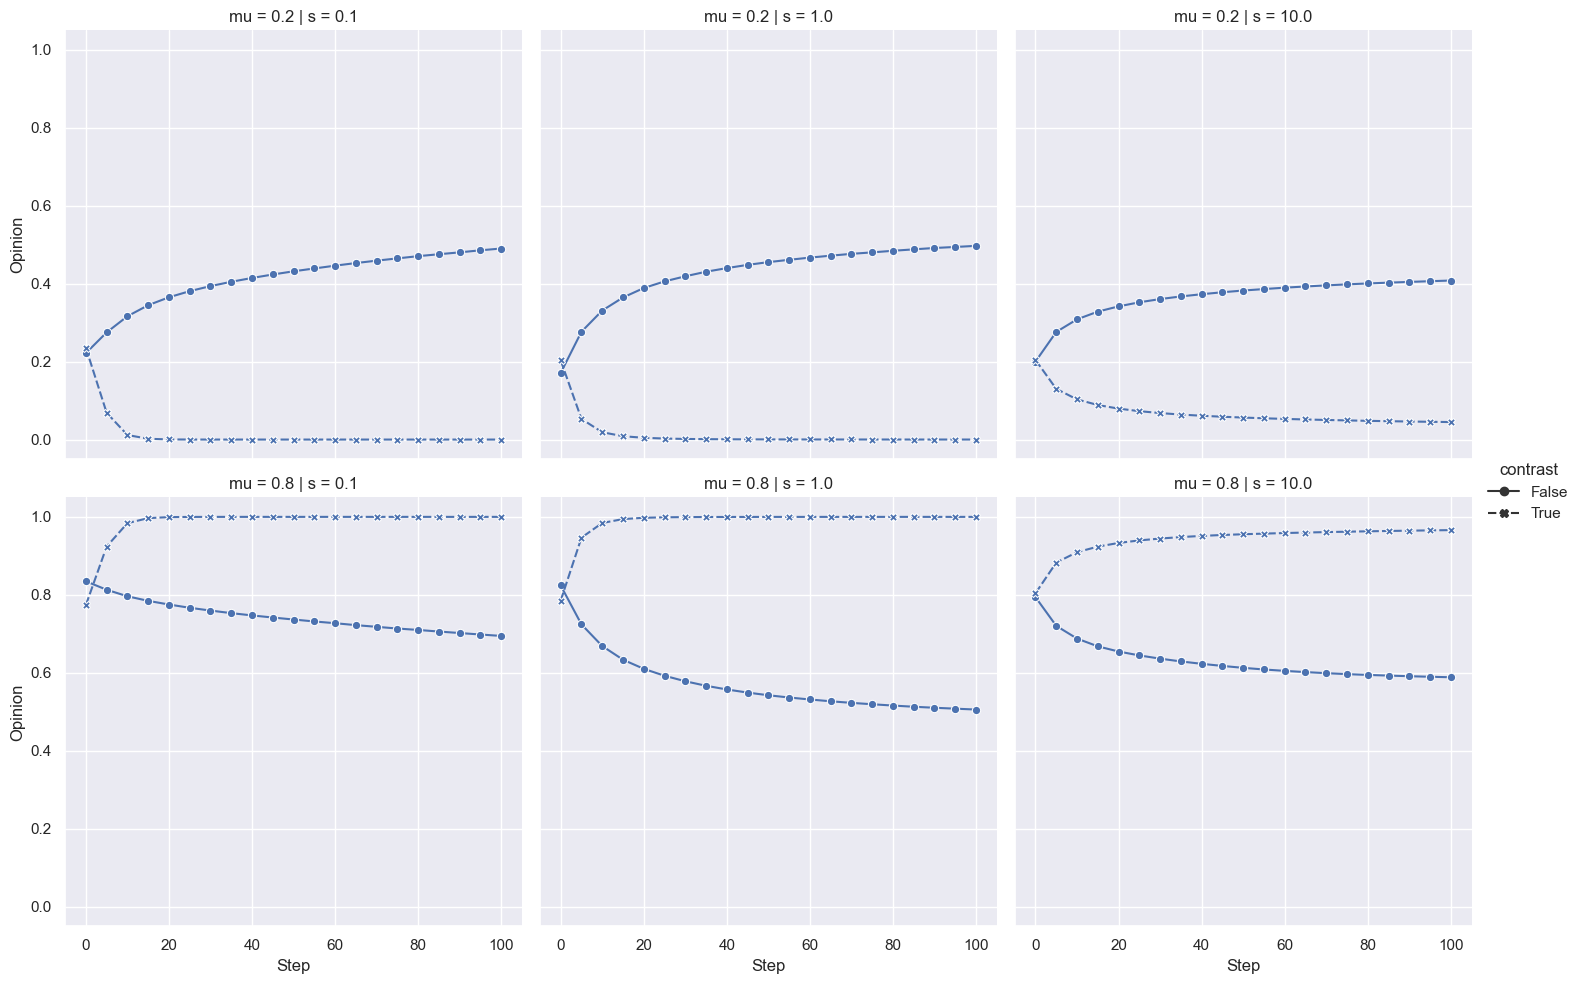

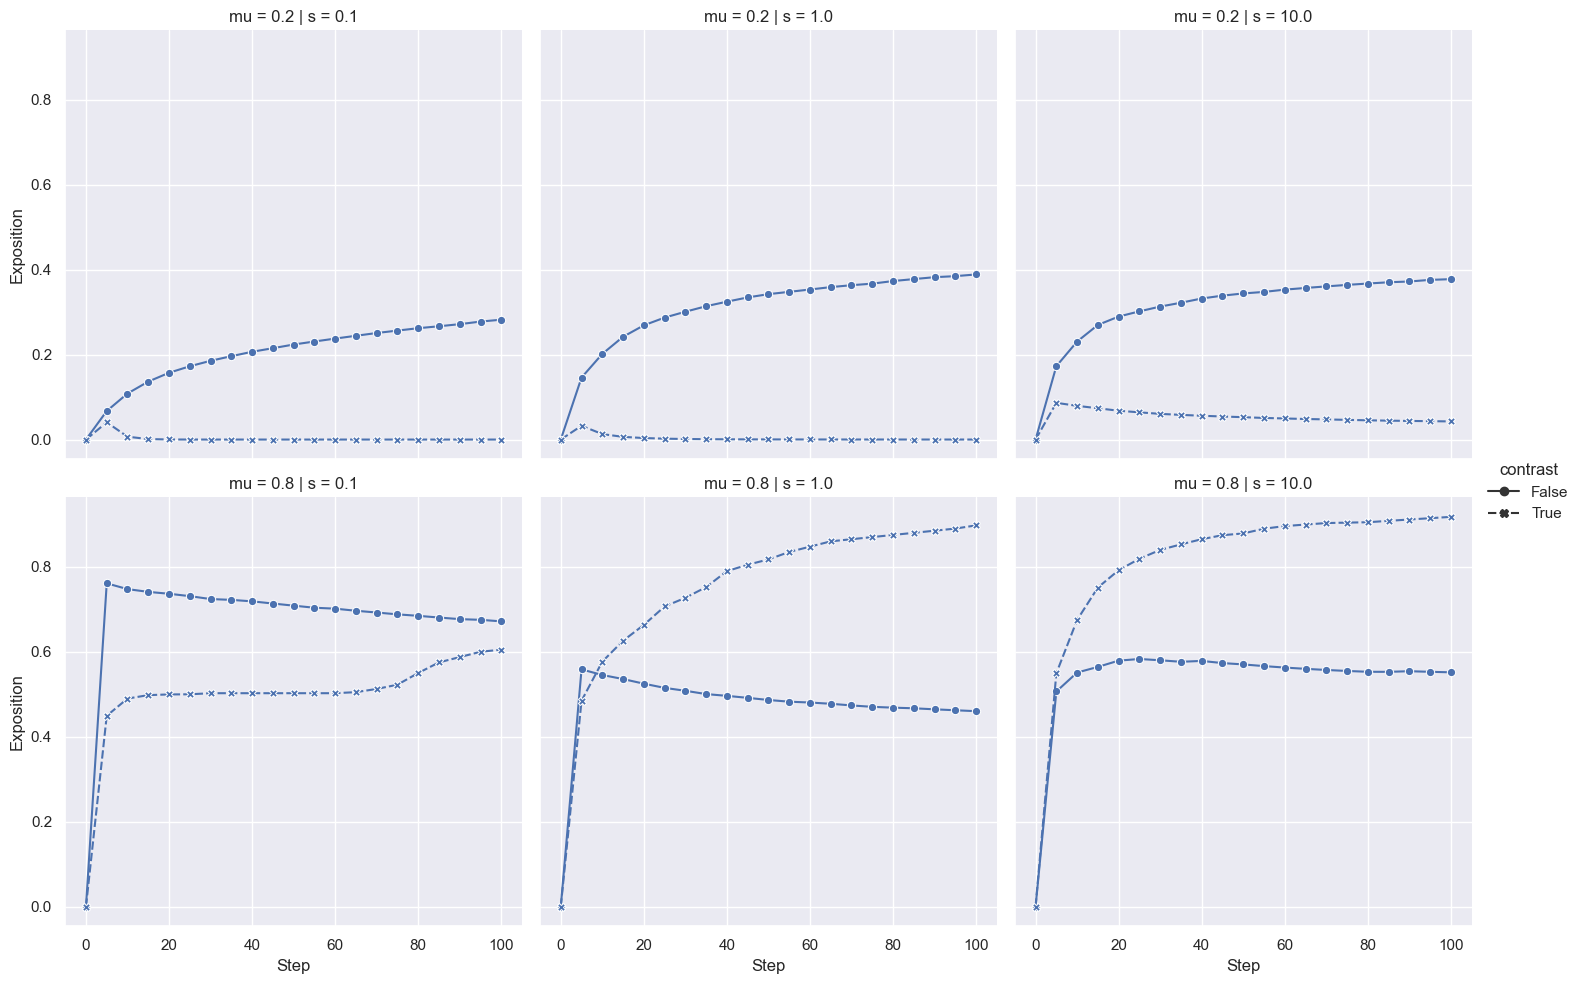

In [98]:
sns.set_theme()

sns.relplot(data = temp, col = "s", row = "mu", style = "contrast",
            x = "Step", y = "Opinion",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full")

sns.relplot(data = temp, col = "s", row = "mu", style = "contrast",
            x = "Step", y = "Exposition",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full")

In [99]:
s_color_dict = {0.01: '#e00000', 0.1: '#f00000', 0.5: '#fd5500', 1: '#ff8000', 5: '#ffa666', 10: '#ffd000', 100: '#fff500'}

In [101]:
temp = df.loc[(df["Step"].isin([0, 100])) & (df["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "quantile", "contrast"])["Opinion"].mean().reset_index()
temp = temp.loc[temp["s"].isin([0.01, 1, 10])]
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 100, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average opinion difference"] = temp.loc[temp["Step"] == 100, "Opinion"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

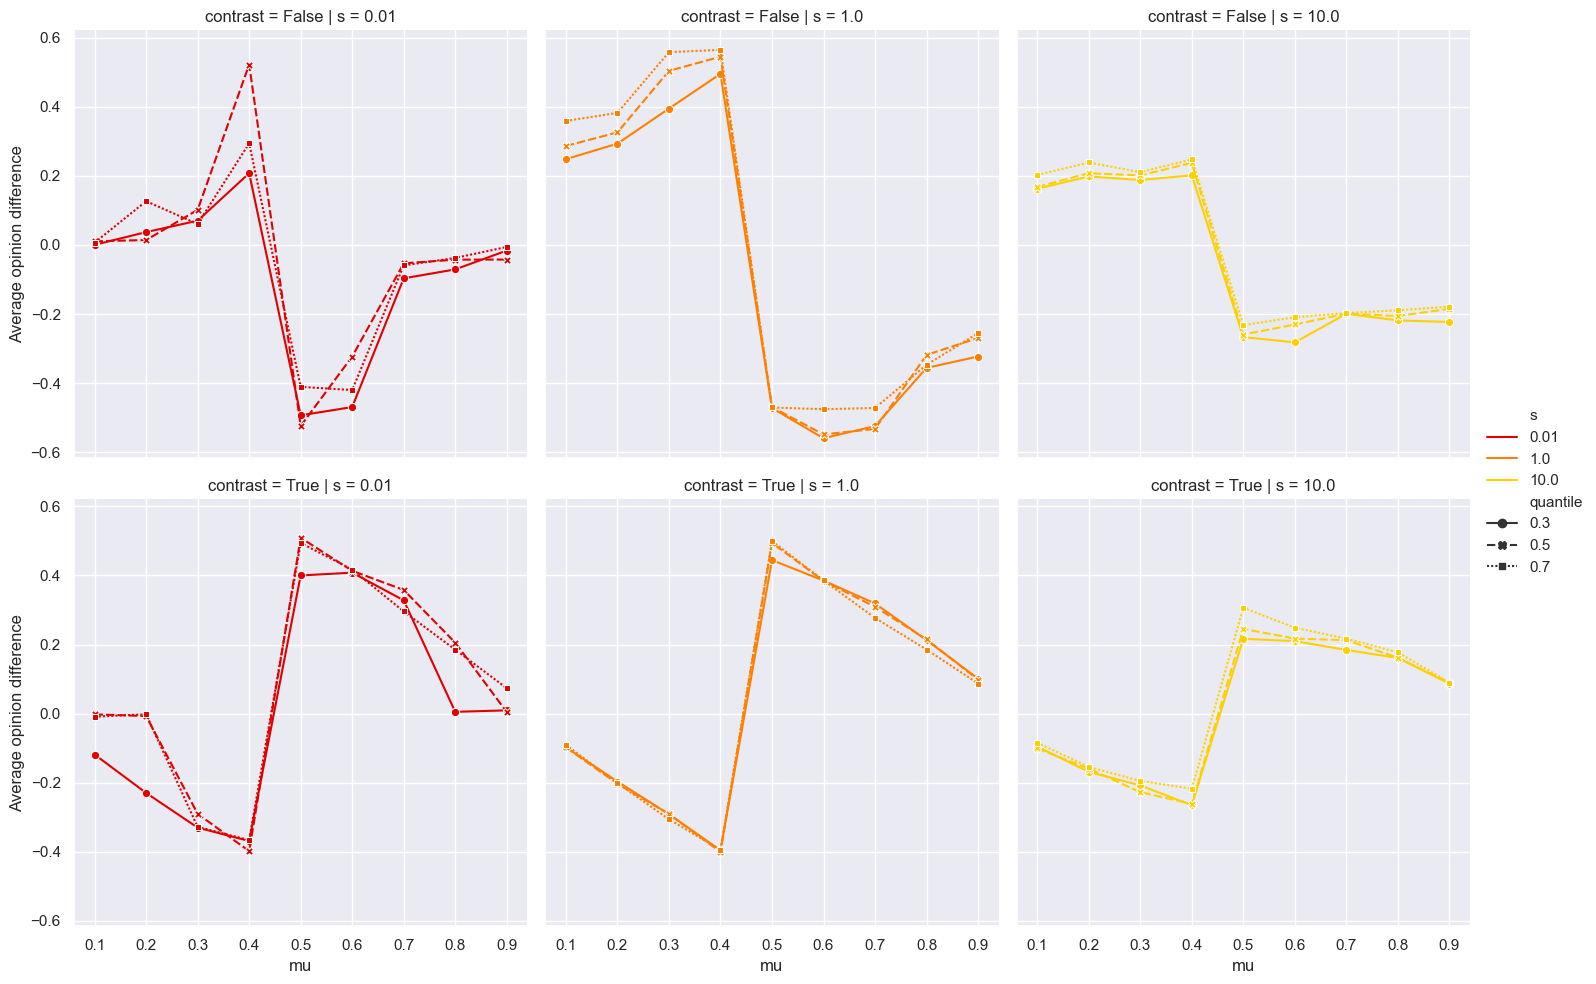

In [103]:
sns.set_theme()

sns.relplot(data = temp2, row = "contrast", col = "s", style = "quantile",
            x = "mu", y = "Average opinion difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

The choice of quantile is not very important.

In [105]:
temp = df.loc[(df["Step"].isin([0, 100])) & (df["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "quantile", "contrast"])["Exposition"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 100, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average exposure difference"] = temp.loc[temp["Step"] == 100, "Exposition"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Exposition"].reset_index(drop = True)

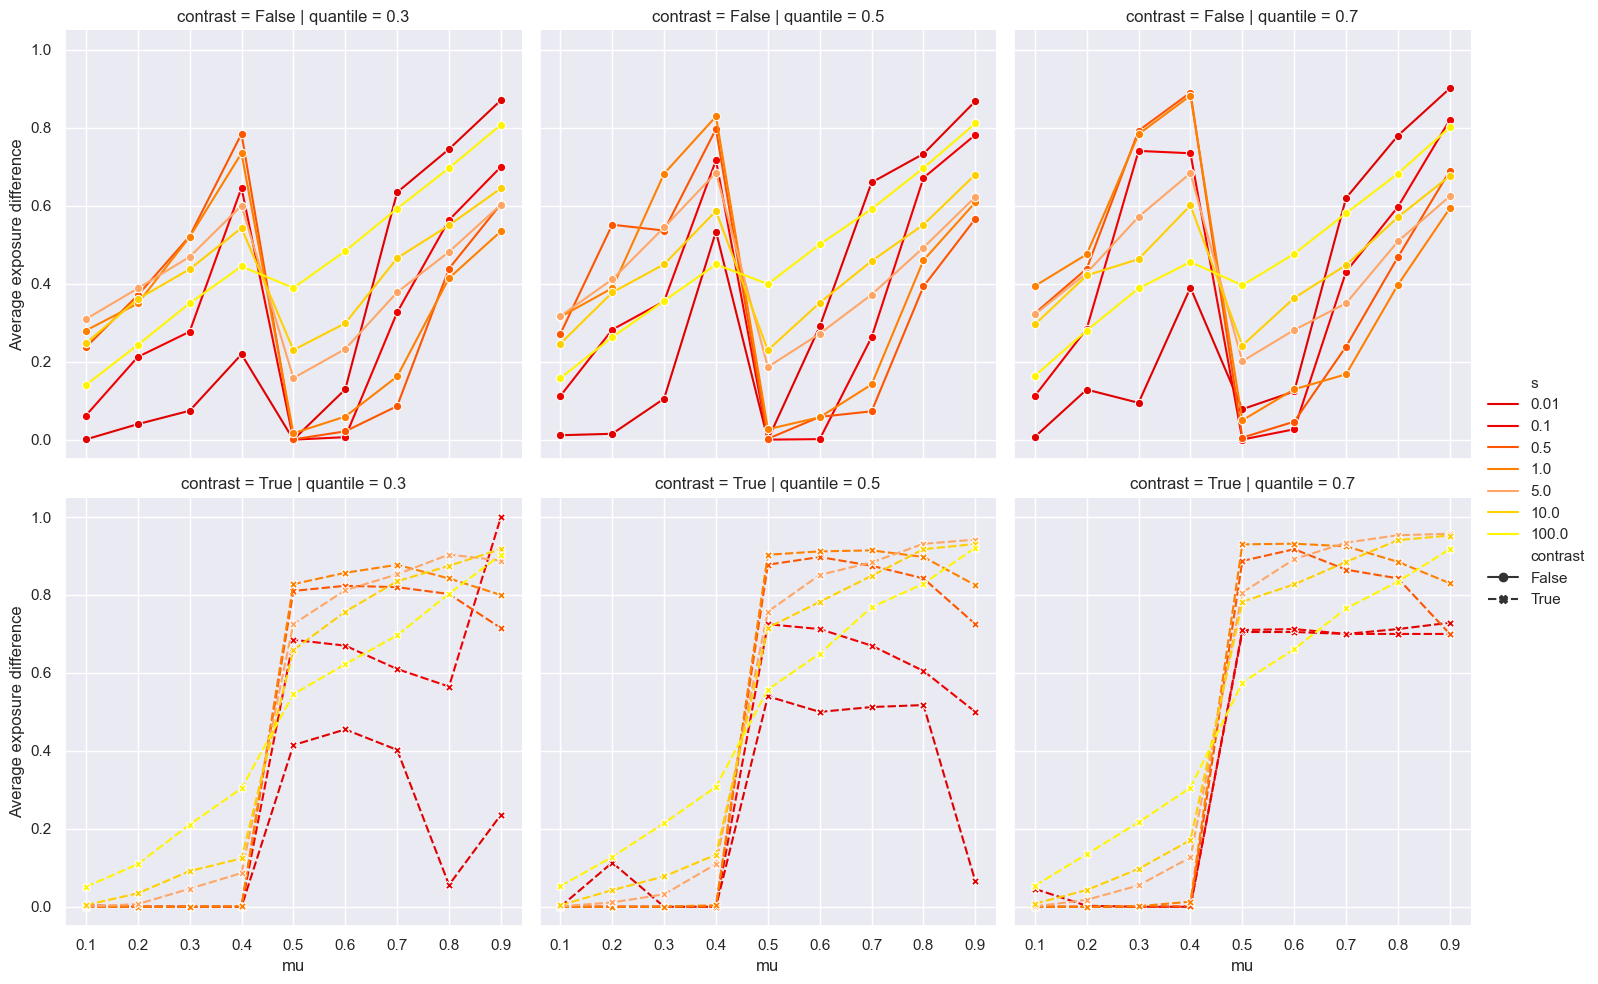

In [106]:
sns.set_theme()

sns.relplot(data = temp2, col = "quantile", row = "contrast", style = "contrast",
            x = "mu", y = "Average exposure difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

### Plot 1

In [107]:
temp = df.loc[(df["Step"].isin([0, 100])) & (df["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "quantile", "contrast"])["Opinion"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 100, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average opinion difference"] = temp.loc[temp["Step"] == 100, "Opinion"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

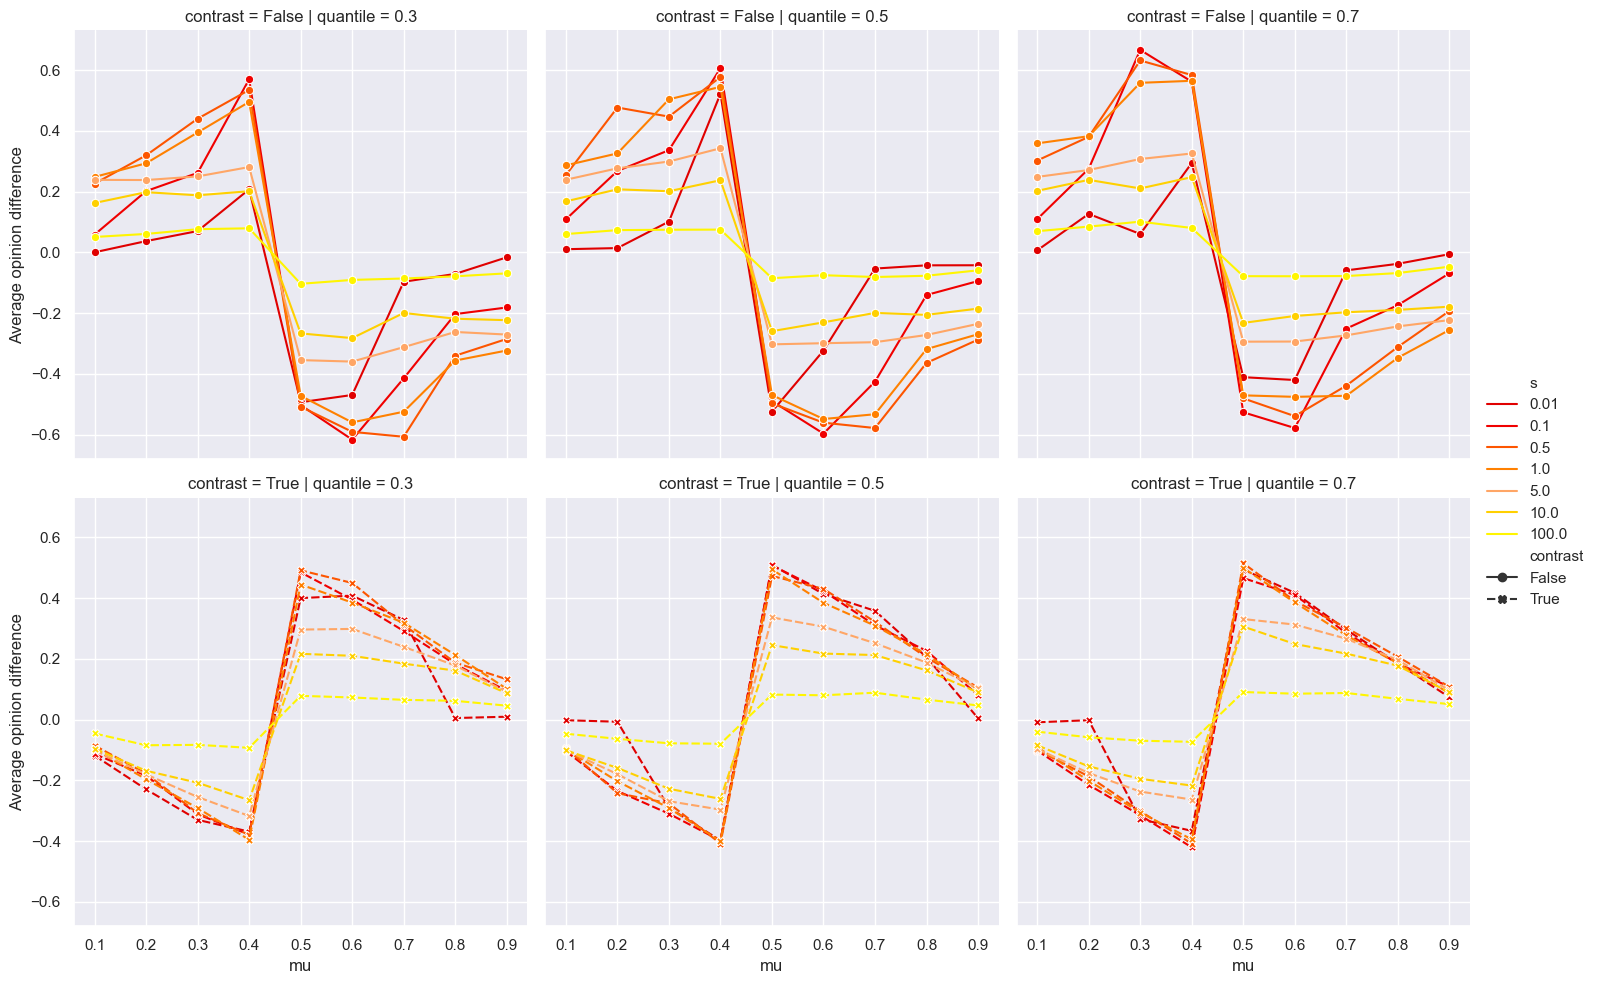

In [108]:
sns.set_theme()

sns.relplot(data = temp2, col = "quantile", row = "contrast", style = "contrast",
            x = "mu", y = "Average opinion difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

### Plot 2

In [109]:
temp = df.loc[(df["Step"].isin([0, 100])) & (df["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "quantile", "contrast"])["Opinion"].std().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 100, :]
temp2 = temp2.reset_index(drop = True)
temp2["Opinion STD difference"] = temp.loc[temp["Step"] == 100, "Opinion"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

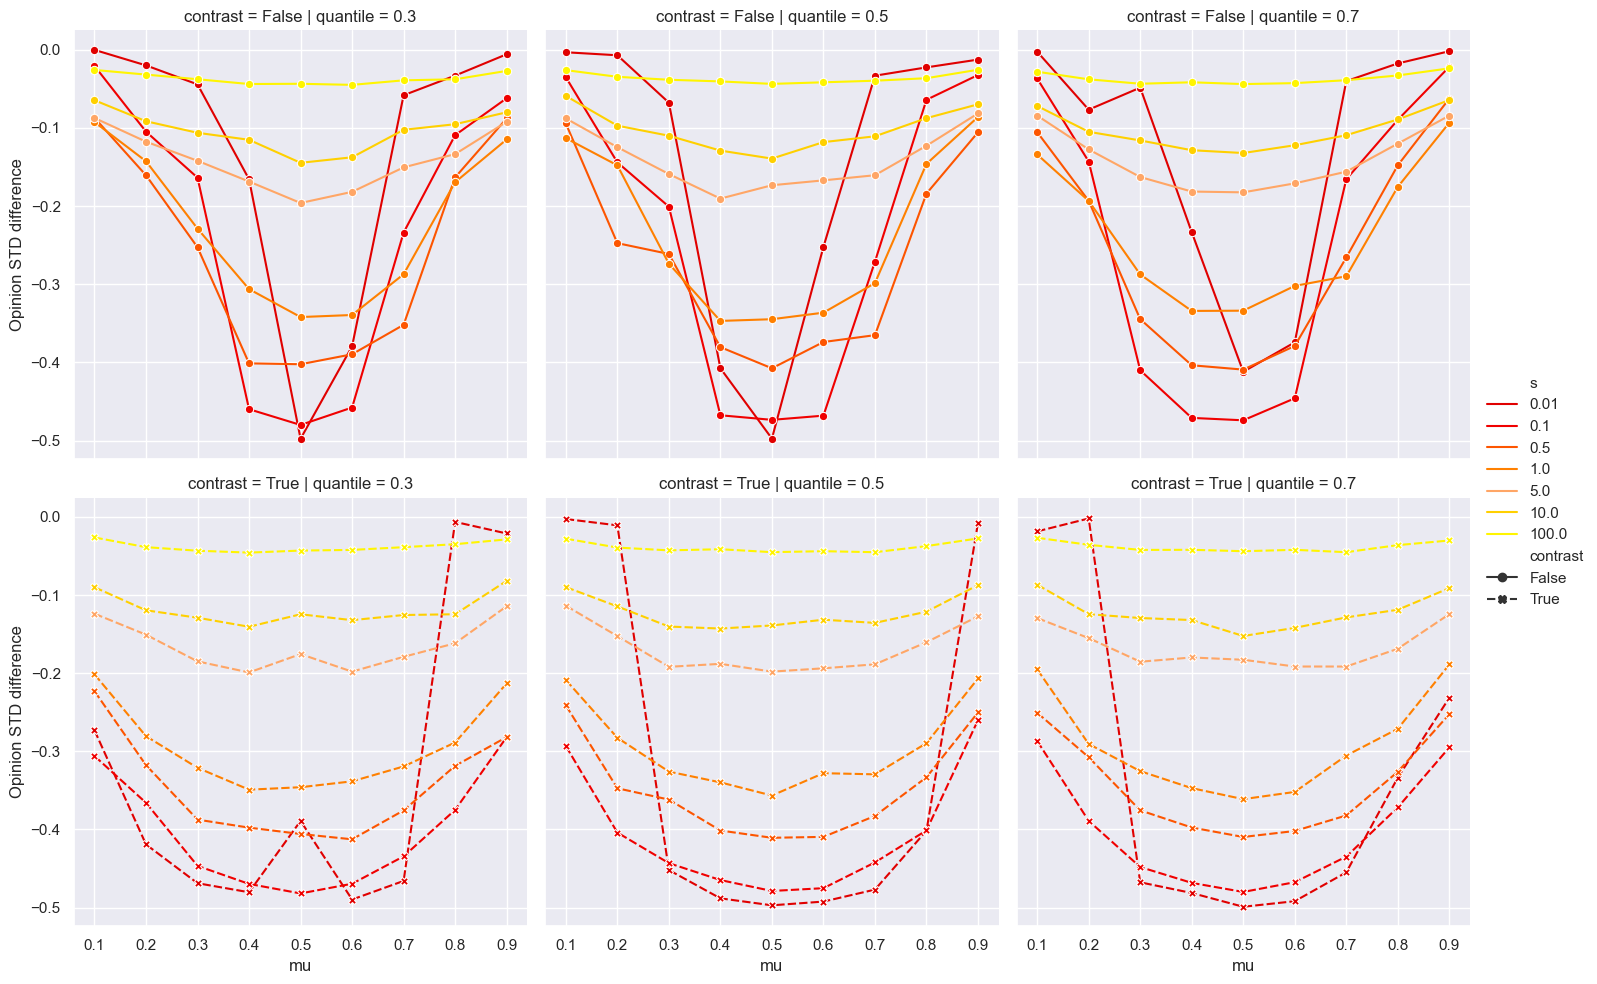

In [110]:
sns.set_theme()

sns.relplot(data = temp2,
            x = "mu", y = "Opinion STD difference", col = "quantile", style = "contrast", row = "contrast",
            hue = "s", kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

### Plot 3

In [111]:
temp = df.loc[(df["Step"].isin([0, 100])) & (df["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "quantile", "contrast", "AgentID"])["Opinion"].mean().reset_index()

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
C:\Users\sdifi\AppData\Local\Temp\ipykernel_21344\2350504156.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.axvline(m, color = "g", label = "$\mu$")


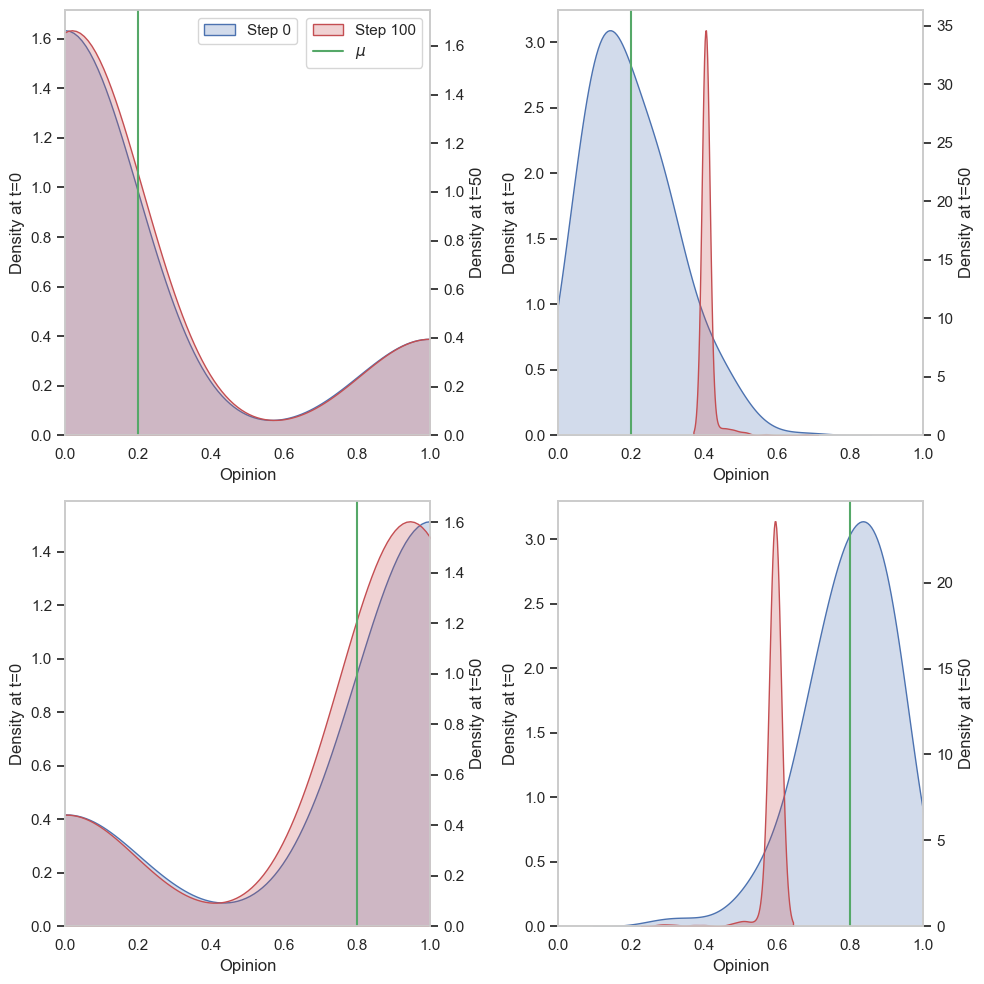

In [113]:
ms = [0.2, 0.8]
ss = [0.01, 10]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
sns.set_style("whitegrid", {'axes.grid' : False})

for i in range(2):
    for j in range(2):
        m = ms[i]
        s = ss[j]
    
        conds = (temp["mu"] == m) & (temp["s"] == s) & (temp["quantile"] == 0.5) & (temp["contrast"] == False)
        
        sns.kdeplot(temp.loc[conds & (temp["Step"] == 0), "Opinion"], bw_method = 0.5, ax = axes[i, j], fill=True, label = "Step 0")
        ax2 = axes[i, j].twinx()
        sns.kdeplot(temp.loc[conds & (temp["Step"] == 100), "Opinion"], bw_method = 0.5, ax = ax2, fill=True, color = "r", label = "Step 100")
        
        plt.axvline(m, color = "g", label = "$\mu$")
        
        axes[i, j].set_ylabel("Density at t=0")
        ax2.set_ylabel("Density at t=50")
        axes[i, j].set_xlim((0, 1))
        if i == 0 and j == 0:        
            axes[i, j].legend(loc = "upper center")
            ax2.legend(loc = "upper right")

plt.tight_layout()
plt.show()

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
C:\Users\sdifi\AppData\Local\Temp\ipykernel_21344\1539925203.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.axvline(m, color = "g", label = "$\mu$")


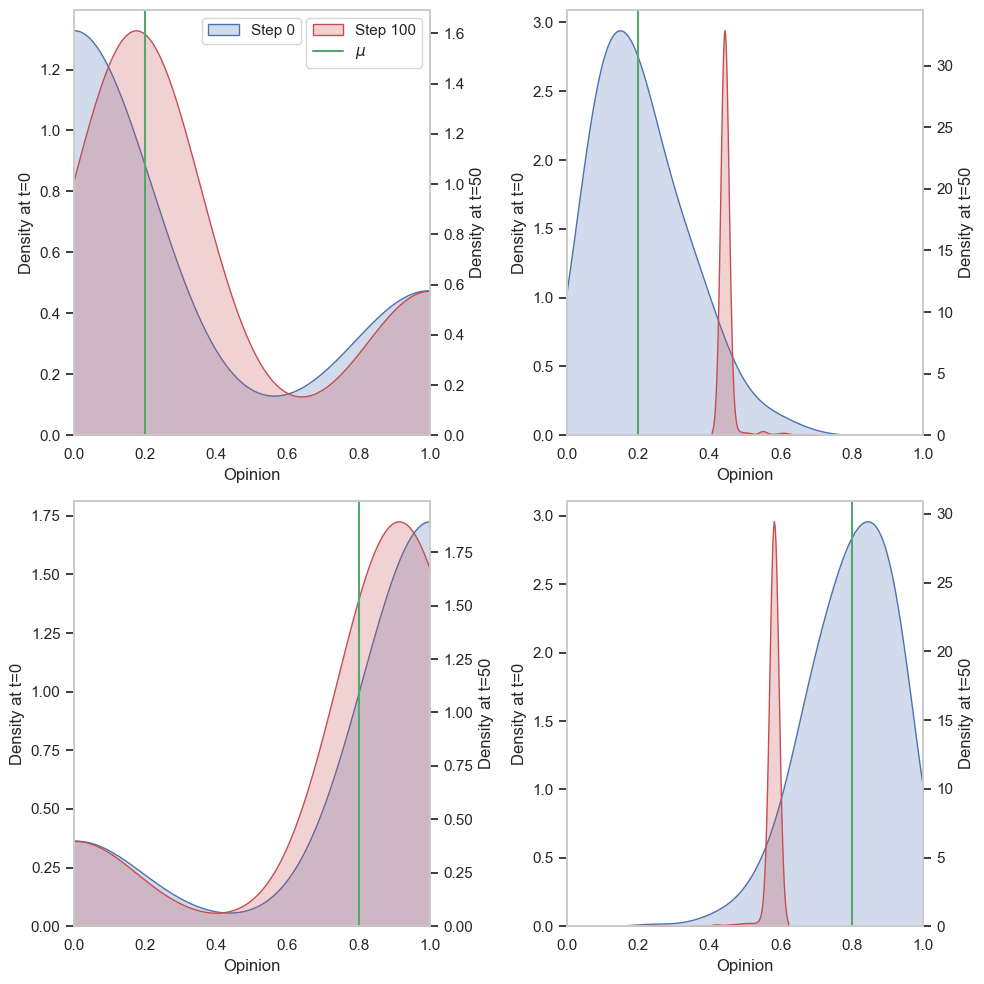

In [114]:
ms = [0.2, 0.8]
ss = [0.01, 10]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
sns.set_style("whitegrid", {'axes.grid' : False})

for i in range(2):
    for j in range(2):
        m = ms[i]
        s = ss[j]
        
        if m == 0.2:
            conds = (temp["mu"] == m) & (temp["s"] == s) & (temp["quantile"] == 0.7) & (temp["contrast"] == False)
        else:
            conds = (temp["mu"] == m) & (temp["s"] == s) & (temp["quantile"] == 0.3) & (temp["contrast"] == False)
        
        sns.kdeplot(temp.loc[conds & (temp["Step"] == 0), "Opinion"], bw_method = 0.5, ax = axes[i, j], fill=True, label = "Step 0")
        ax2 = axes[i, j].twinx()
        sns.kdeplot(temp.loc[conds & (temp["Step"] == 100), "Opinion"], bw_method = 0.5, ax = ax2, fill=True, color = "r", label = "Step 100")
        
        plt.axvline(m, color = "g", label = "$\mu$")
        
        axes[i, j].set_ylabel("Density at t=0")
        ax2.set_ylabel("Density at t=50")
        axes[i, j].set_xlim((0, 1))
        if i == 0 and j == 0:        
            axes[i, j].legend(loc = "upper center")
            ax2.legend(loc = "upper right")

plt.tight_layout()
plt.show()

### Plot 6 - 7 *

In [115]:
temp = df.loc[(df["Step"].isin([0, 100])) & (df["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "quantile", "contrast"])["Assortativity"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 100, :]
temp2 = temp2.reset_index(drop = True)
temp2["Assortativity difference"] = temp.loc[temp["Step"] == 100, "Assortativity"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Assortativity"].reset_index(drop = True)

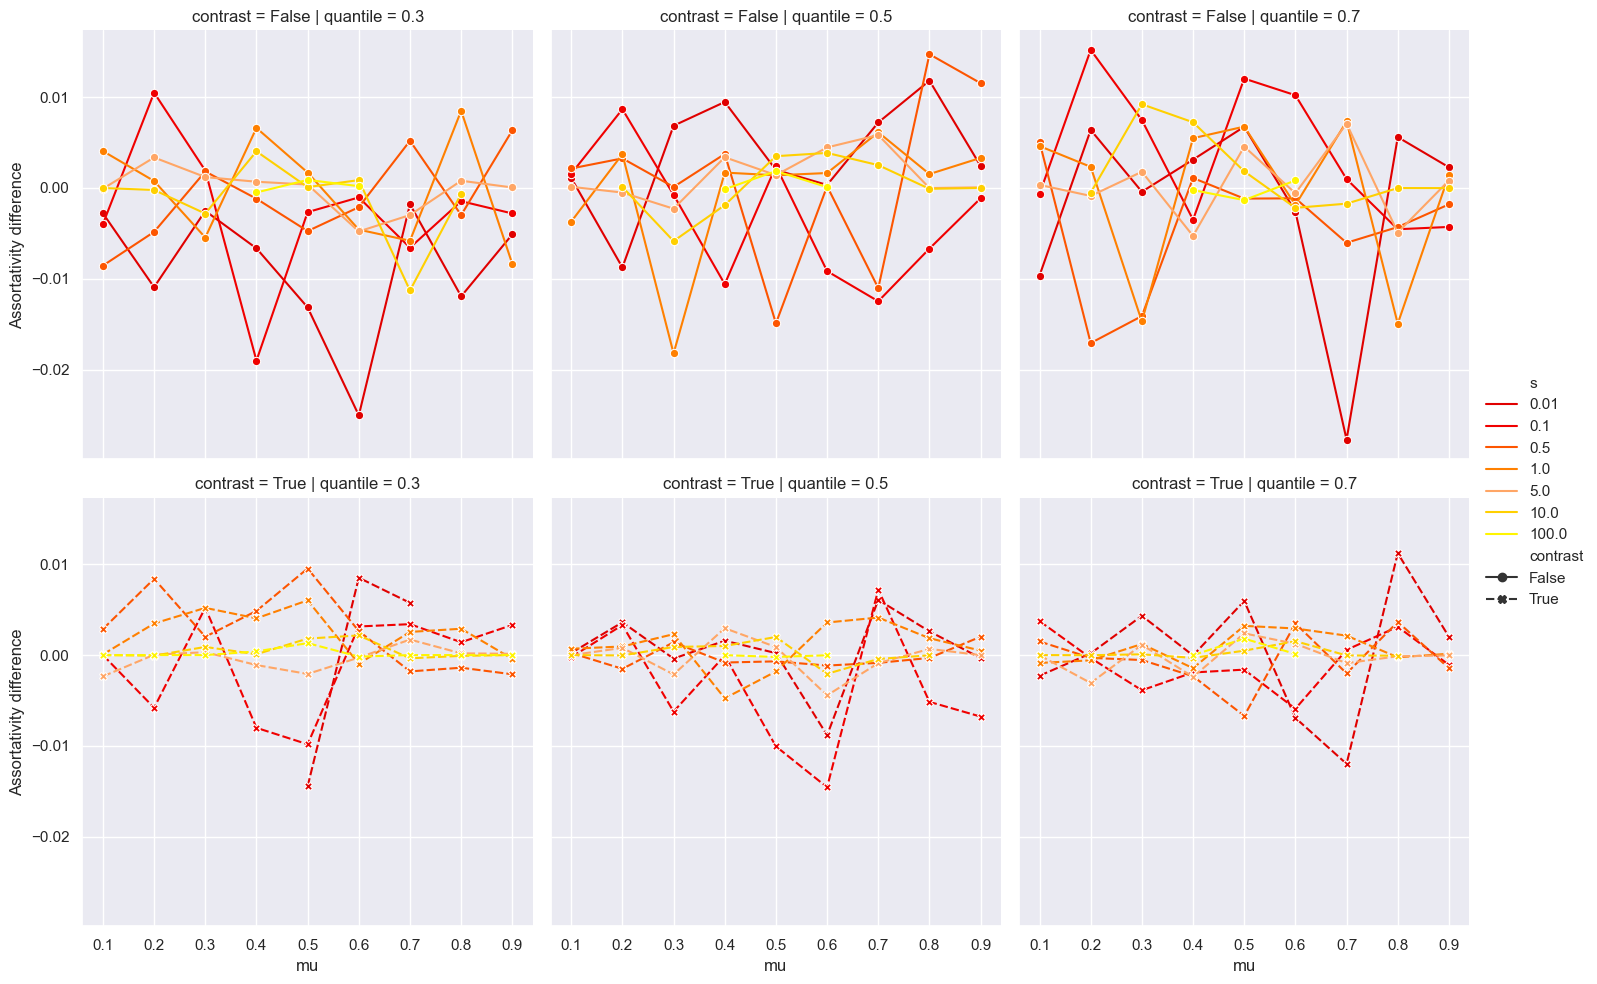

In [116]:
sns.set_theme()

sns.relplot(data = temp2,
            x = "mu", y = "Assortativity difference", hue = "s", col = "quantile", row = "contrast", style = "contrast",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

In [117]:
temp = df.loc[(df["Step"].isin([0, 100])) & (df["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "quantile", "contrast"])["Average degree"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 100, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average degree difference"] = temp.loc[temp["Step"] == 100, "Average degree"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Average degree"].reset_index(drop = True)

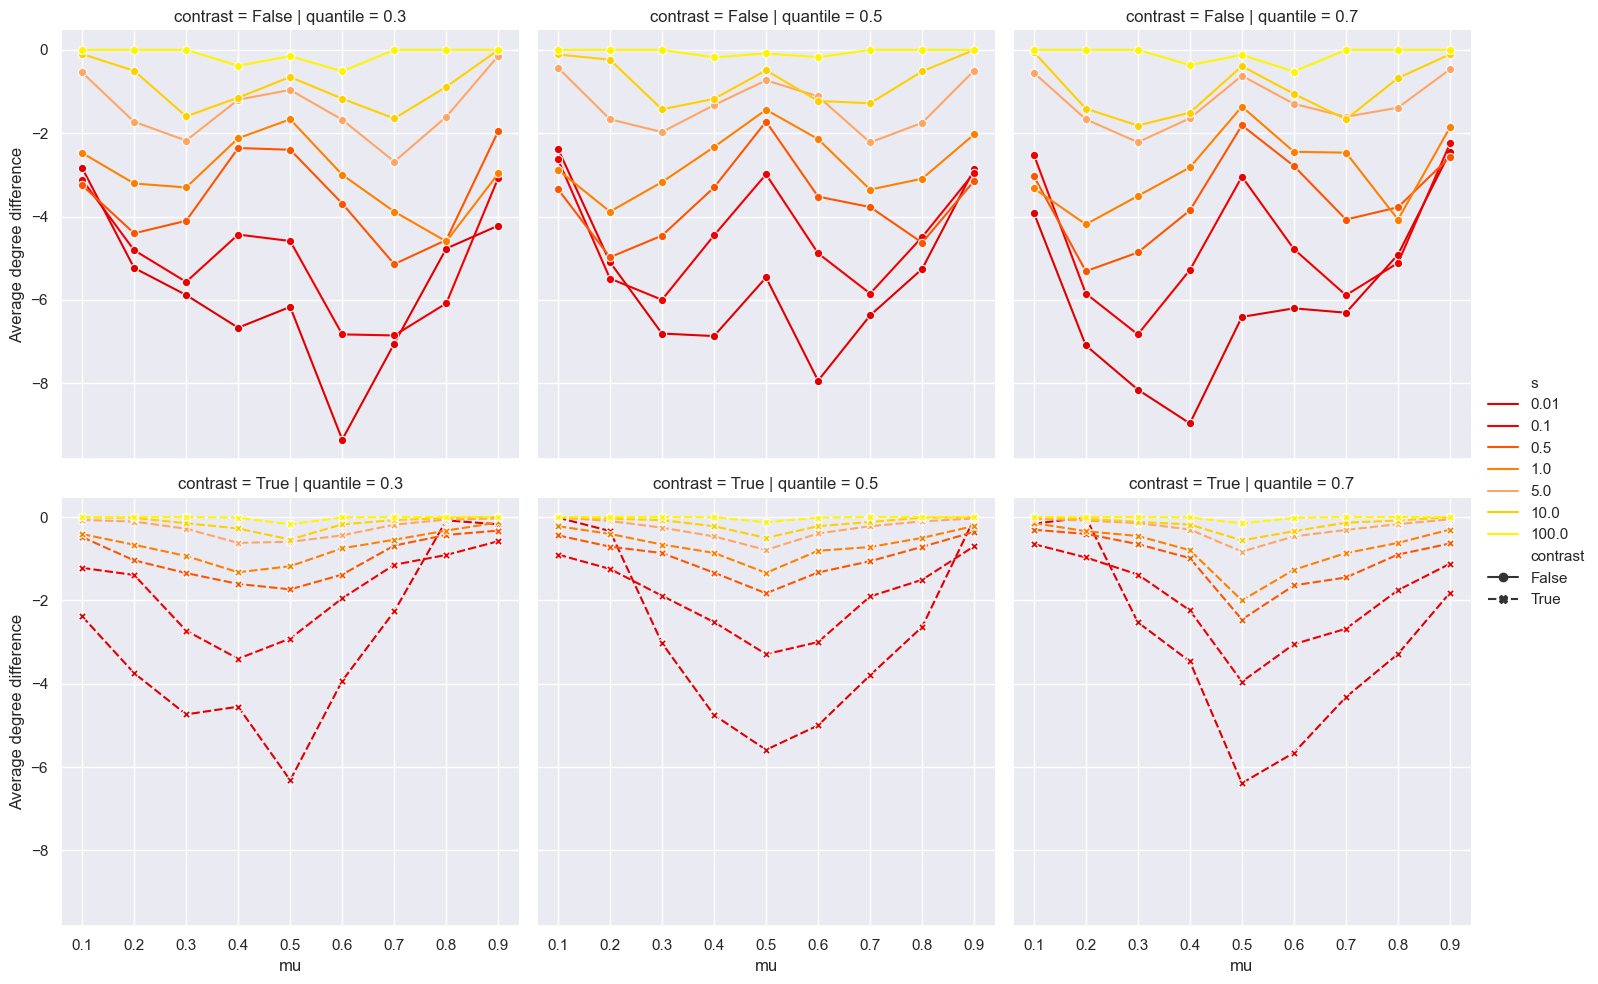

In [118]:
sns.set_theme()

sns.relplot(data = temp2,
            x = "mu", y = "Average degree difference", hue = "s", col = "quantile", row = "contrast", style = "contrast",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

## ER

In [119]:
df2 = pd.read_csv("df_er_n400_k20_v2.csv", index_col = 0)

In [120]:
df2.head()

RunId  iteration  Step   mu     s  strategy  quantile  contrast  \
0      0          0     0  0.1  0.01       0.5       0.3      True   
1      0          0     0  0.1  0.01       0.5       0.3      True   
2      0          0     0  0.1  0.01       0.5       0.3      True   
3      0          0     0  0.1  0.01       0.5       0.3      True   
4      0          0     0  0.1  0.01       0.5       0.3      True   

   Assortativity  Average degree links removed  AgentID        Opinion  \
0            NaN           20.06            []        0   0.000000e+00   
1            NaN           20.06            []        1  2.435351e-210   
2            NaN           20.06            []        2  2.725855e-253   
3            NaN           20.06            []        3   0.000000e+00   
4            NaN           20.06            []        4   1.284266e-62   

   Exposition  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

### Plot 0:

In [122]:
temp = df2.loc[(df2["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "quantile", "contrast"])[["Opinion", "Exposition"]].mean().reset_index()
temp = temp.loc[temp["quantile"] == 0.5, :]
temp = temp.loc[temp["mu"].isin([0.2, 0.8]), :]
temp = temp.loc[temp["s"].isin([0.1, 1, 10]), :]

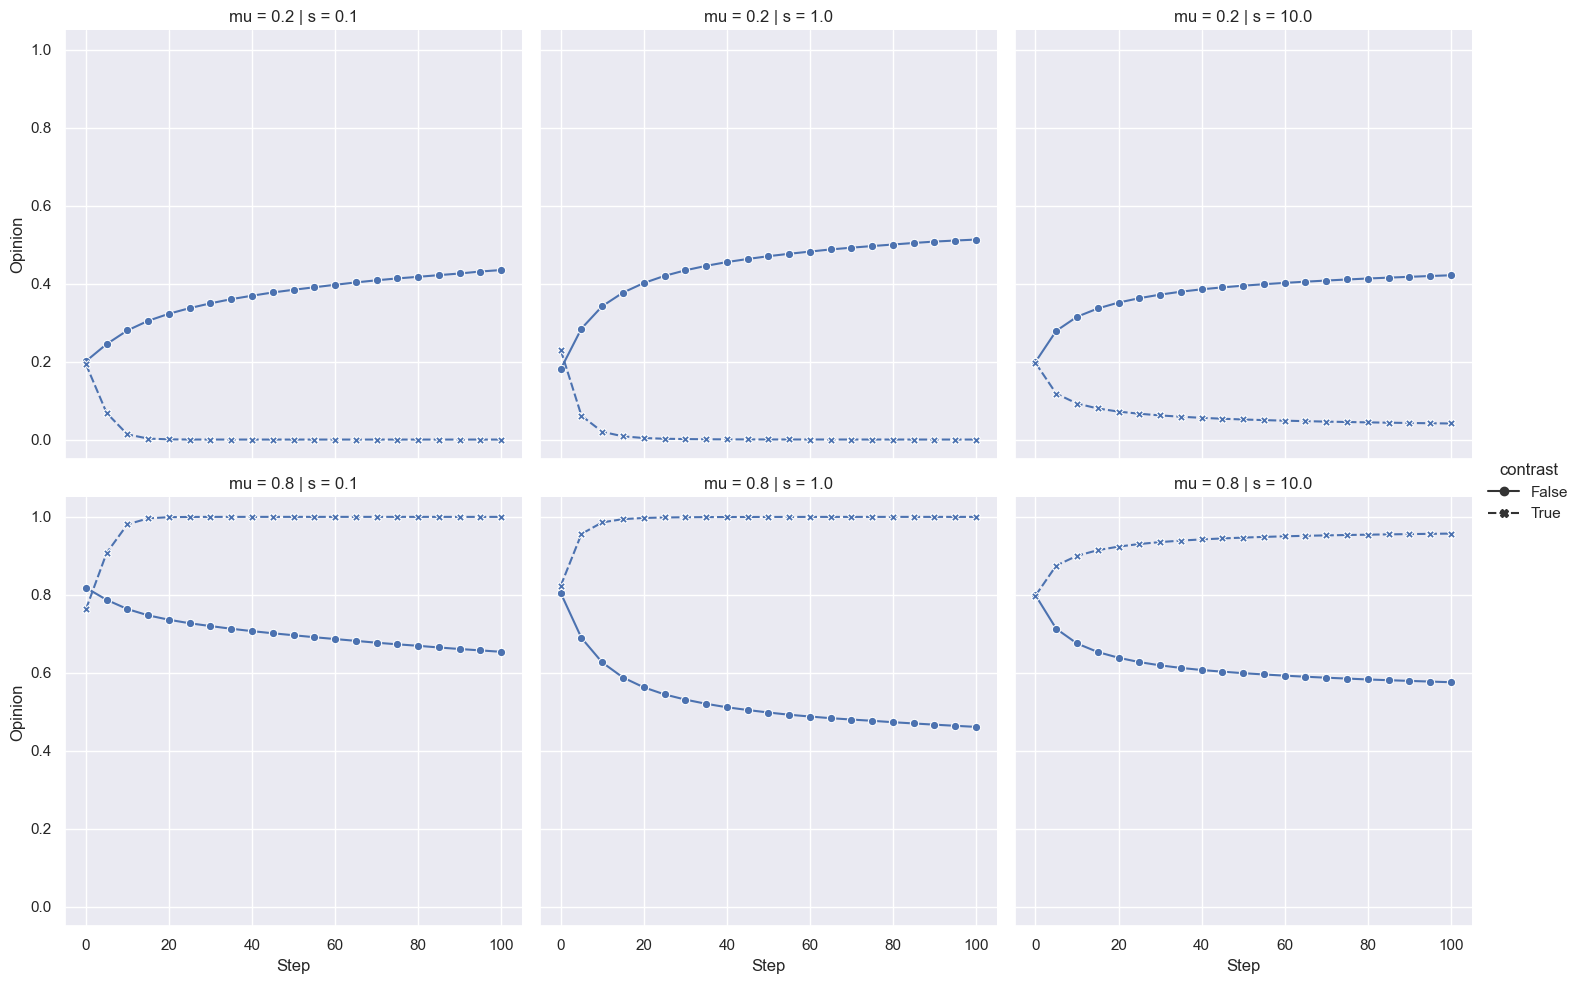

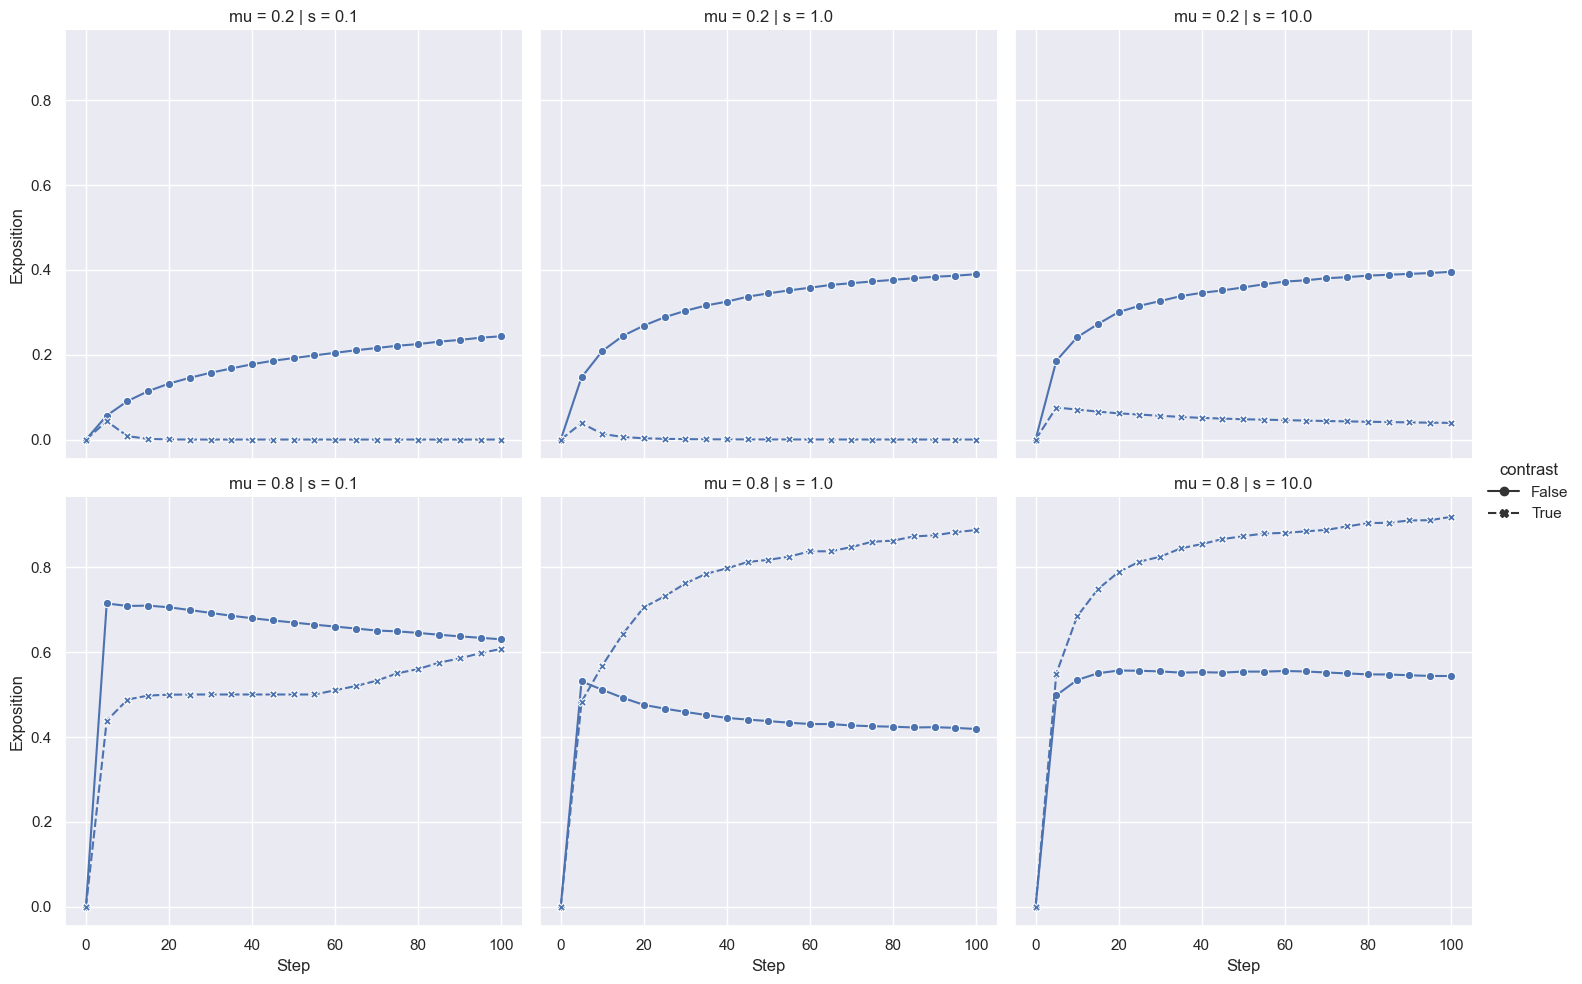

In [123]:
sns.set_theme()

sns.relplot(data = temp, col = "s", row = "mu", style = "contrast",
            x = "Step", y = "Opinion",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full")

sns.relplot(data = temp, col = "s", row = "mu", style = "contrast",
            x = "Step", y = "Exposition",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full")

In [124]:
temp = df2.loc[(df2["Step"].isin([0, 100])) & (df2["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "quantile", "contrast"])["Opinion"].mean().reset_index()
temp = temp.loc[temp["s"].isin([0.01, 1, 10])]
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 100, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average opinion difference"] = temp.loc[temp["Step"] == 100, "Opinion"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

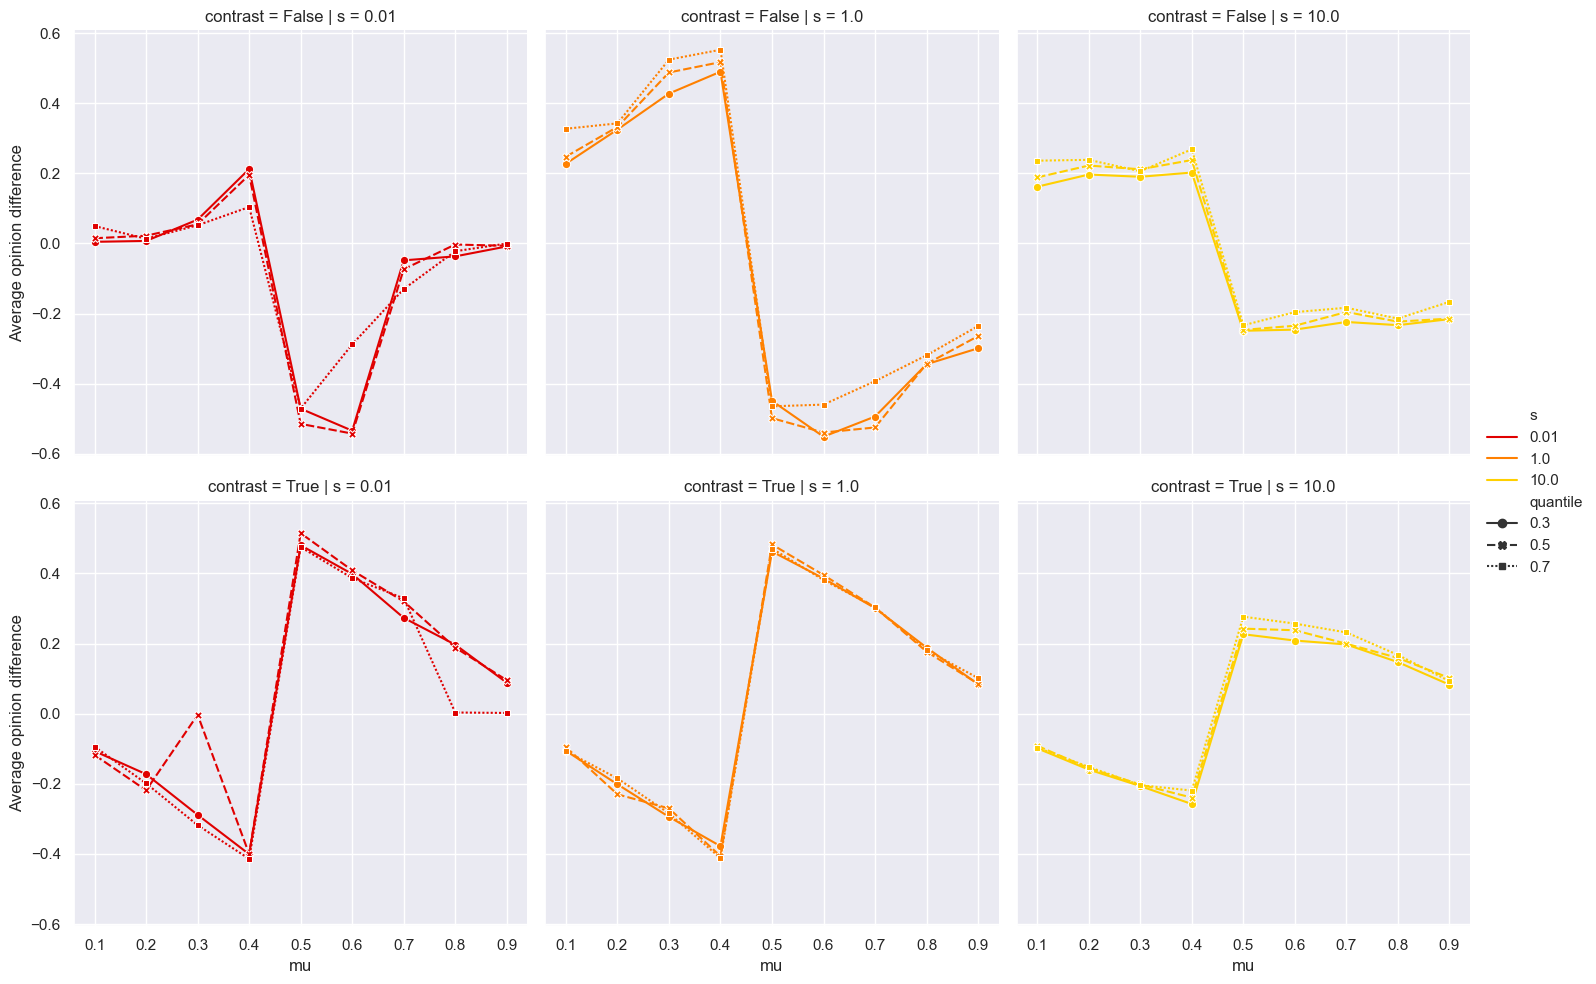

In [125]:
sns.set_theme()

sns.relplot(data = temp2, row = "contrast", col = "s", style = "quantile",
            x = "mu", y = "Average opinion difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

The choice of quantile is not very important.

In [126]:
temp = df2.loc[(df2["Step"].isin([0, 100])) & (df2["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "quantile", "contrast"])["Exposition"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 100, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average exposure difference"] = temp.loc[temp["Step"] == 100, "Exposition"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Exposition"].reset_index(drop = True)

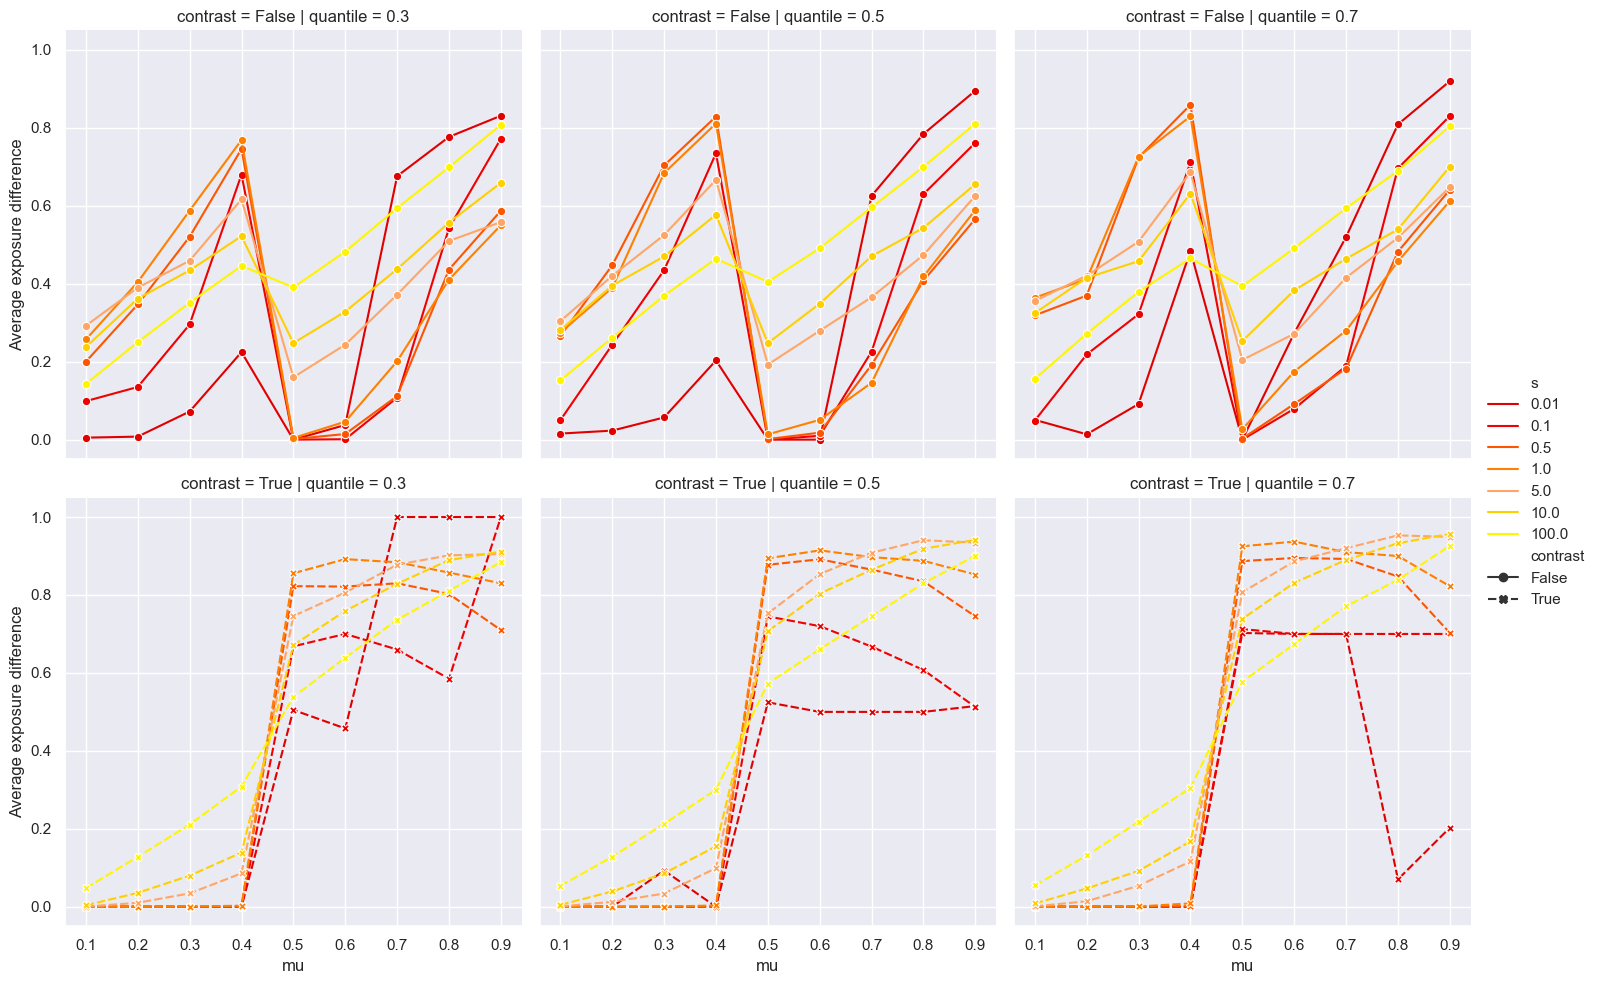

In [127]:
sns.set_theme()

sns.relplot(data = temp2, col = "quantile", row = "contrast", style = "contrast",
            x = "mu", y = "Average exposure difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

### Plot 1

In [128]:
temp = df2.loc[(df2["Step"].isin([0, 100])) & (df2["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "quantile", "contrast"])["Opinion"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 100, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average opinion difference"] = temp.loc[temp["Step"] == 100, "Opinion"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

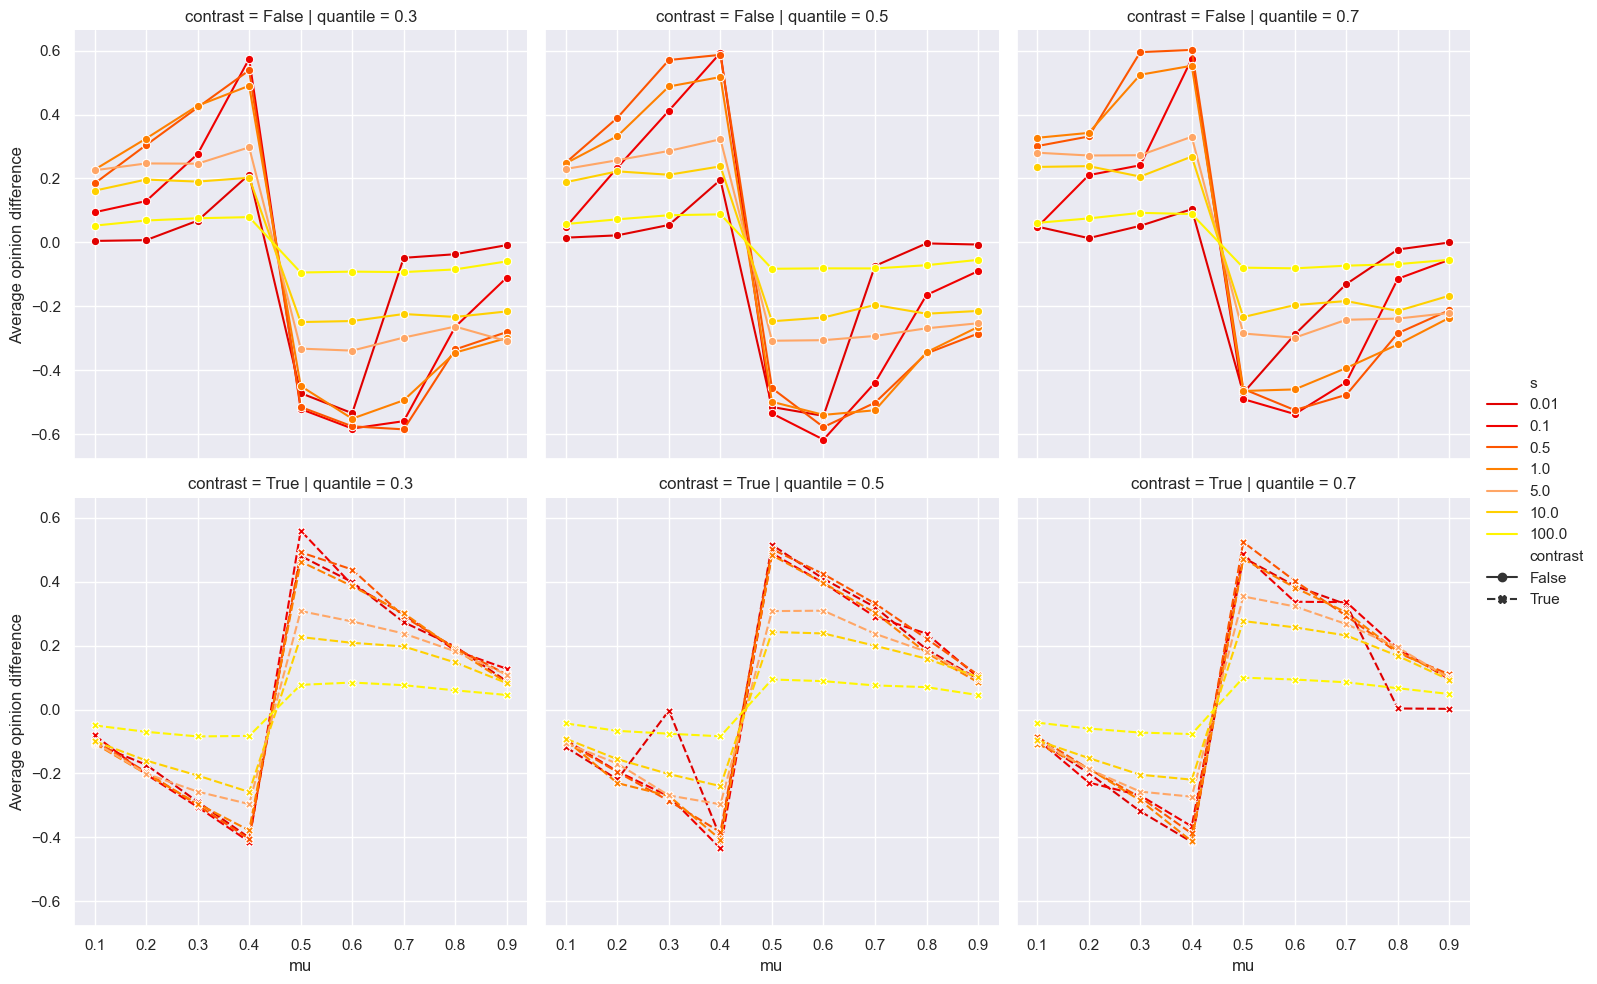

In [129]:
sns.set_theme()

sns.relplot(data = temp2, col = "quantile", row = "contrast", style = "contrast",
            x = "mu", y = "Average opinion difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

### Plot 2

In [130]:
temp = df2.loc[(df2["Step"].isin([0, 100])) & (df2["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "quantile", "contrast"])["Opinion"].std().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 100, :]
temp2 = temp2.reset_index(drop = True)
temp2["Opinion STD difference"] = temp.loc[temp["Step"] == 100, "Opinion"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

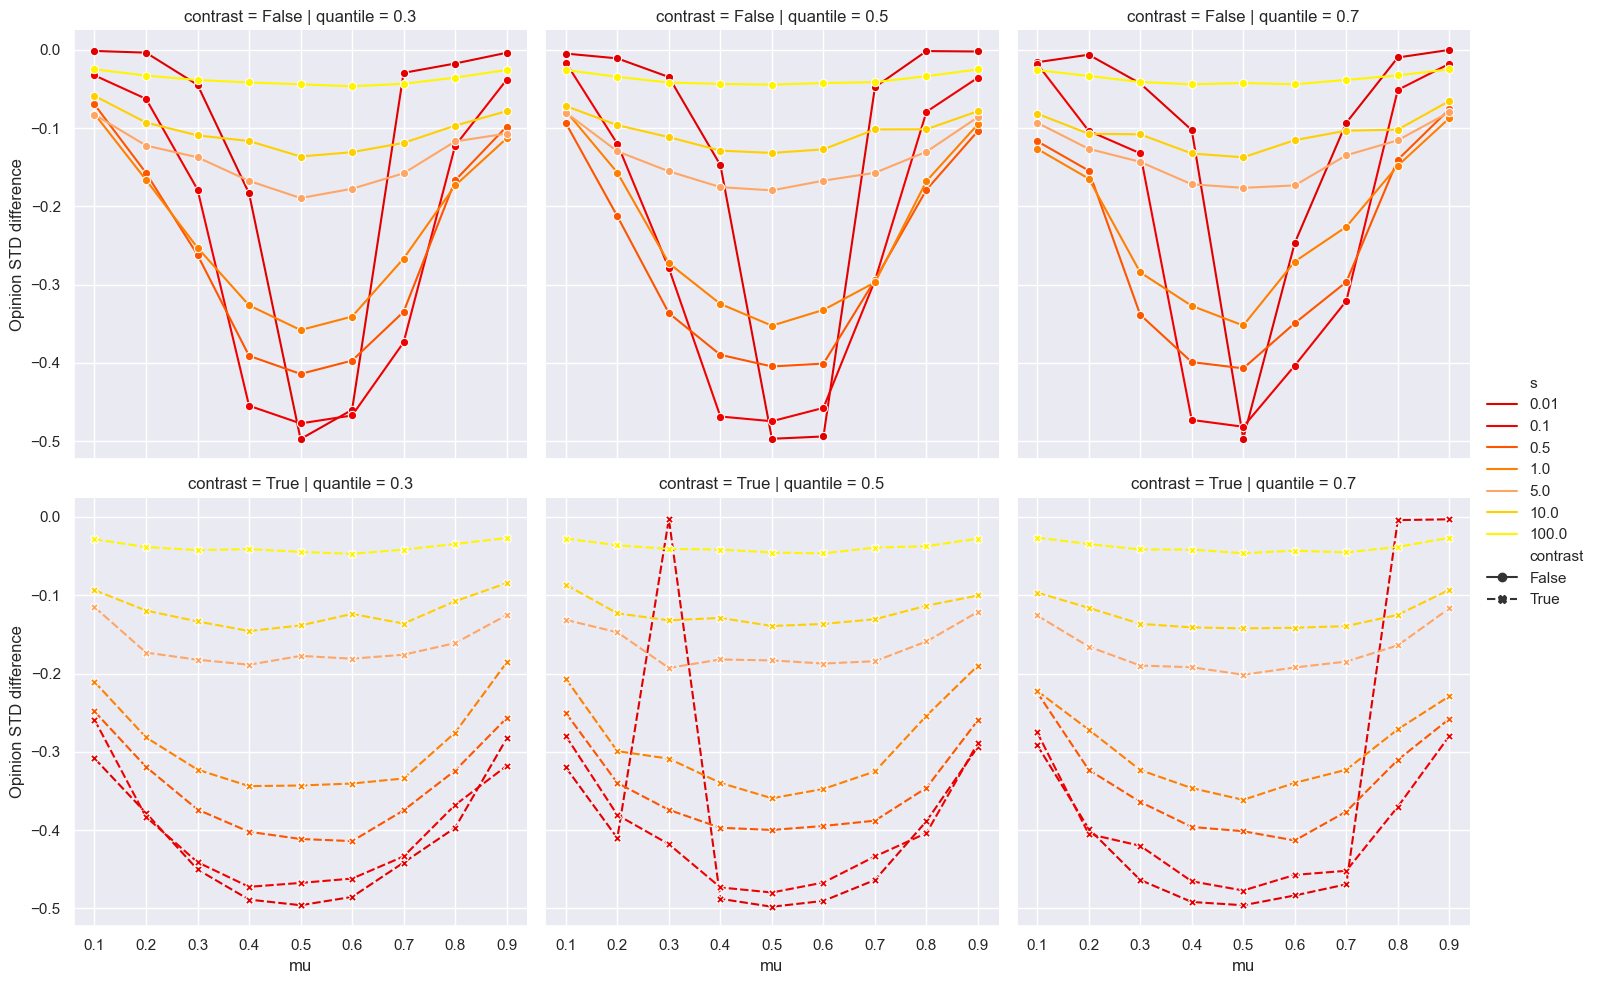

In [131]:
sns.set_theme()

sns.relplot(data = temp2,
            x = "mu", y = "Opinion STD difference", col = "quantile", style = "contrast", row = "contrast",
            hue = "s", kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

### Plot 3

In [132]:
temp = df2.loc[(df2["Step"].isin([0, 100])) & (df2["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "quantile", "contrast", "AgentID"])["Opinion"].mean().reset_index()

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
C:\Users\sdifi\AppData\Local\Temp\ipykernel_21344\2350504156.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.axvline(m, color = "g", label = "$\mu$")


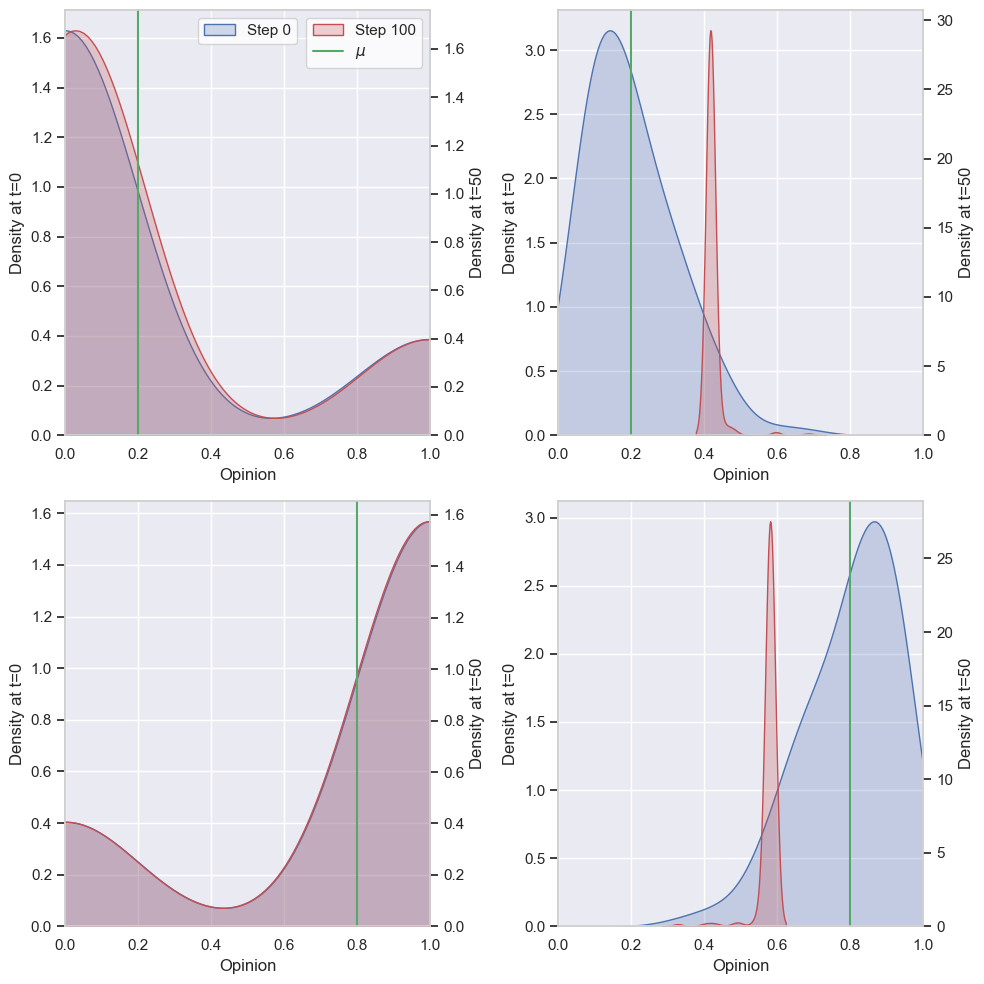

In [133]:
ms = [0.2, 0.8]
ss = [0.01, 10]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
sns.set_style("whitegrid", {'axes.grid' : False})

for i in range(2):
    for j in range(2):
        m = ms[i]
        s = ss[j]
    
        conds = (temp["mu"] == m) & (temp["s"] == s) & (temp["quantile"] == 0.5) & (temp["contrast"] == False)
        
        sns.kdeplot(temp.loc[conds & (temp["Step"] == 0), "Opinion"], bw_method = 0.5, ax = axes[i, j], fill=True, label = "Step 0")
        ax2 = axes[i, j].twinx()
        sns.kdeplot(temp.loc[conds & (temp["Step"] == 100), "Opinion"], bw_method = 0.5, ax = ax2, fill=True, color = "r", label = "Step 100")
        
        plt.axvline(m, color = "g", label = "$\mu$")
        
        axes[i, j].set_ylabel("Density at t=0")
        ax2.set_ylabel("Density at t=50")
        axes[i, j].set_xlim((0, 1))
        if i == 0 and j == 0:        
            axes[i, j].legend(loc = "upper center")
            ax2.legend(loc = "upper right")

plt.tight_layout()
plt.show()

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
C:\Users\sdifi\AppData\Local\Temp\ipykernel_21344\1539925203.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.axvline(m, color = "g", label = "$\mu$")


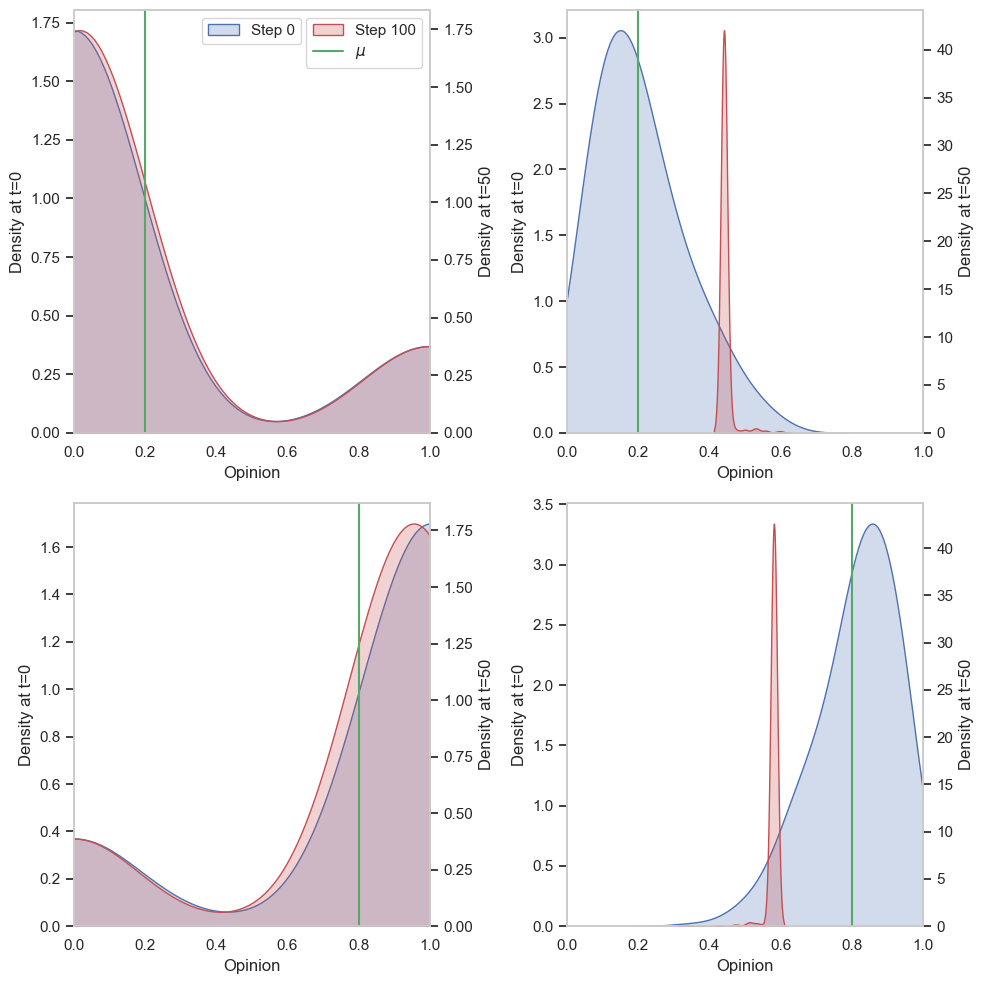

In [134]:
ms = [0.2, 0.8]
ss = [0.01, 10]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
sns.set_style("whitegrid", {'axes.grid' : False})

for i in range(2):
    for j in range(2):
        m = ms[i]
        s = ss[j]
        
        if m == 0.2:
            conds = (temp["mu"] == m) & (temp["s"] == s) & (temp["quantile"] == 0.7) & (temp["contrast"] == False)
        else:
            conds = (temp["mu"] == m) & (temp["s"] == s) & (temp["quantile"] == 0.3) & (temp["contrast"] == False)
        
        sns.kdeplot(temp.loc[conds & (temp["Step"] == 0), "Opinion"], bw_method = 0.5, ax = axes[i, j], fill=True, label = "Step 0")
        ax2 = axes[i, j].twinx()
        sns.kdeplot(temp.loc[conds & (temp["Step"] == 100), "Opinion"], bw_method = 0.5, ax = ax2, fill=True, color = "r", label = "Step 100")
        
        plt.axvline(m, color = "g", label = "$\mu$")
        
        axes[i, j].set_ylabel("Density at t=0")
        ax2.set_ylabel("Density at t=50")
        axes[i, j].set_xlim((0, 1))
        if i == 0 and j == 0:        
            axes[i, j].legend(loc = "upper center")
            ax2.legend(loc = "upper right")

plt.tight_layout()
plt.show()

### Plot 6 - 7 *

In [135]:
temp = df2.loc[(df2["Step"].isin([0, 100])) & (df2["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "quantile", "contrast"])["Assortativity"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 100, :]
temp2 = temp2.reset_index(drop = True)
temp2["Assortativity difference"] = temp.loc[temp["Step"] == 100, "Assortativity"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Assortativity"].reset_index(drop = True)

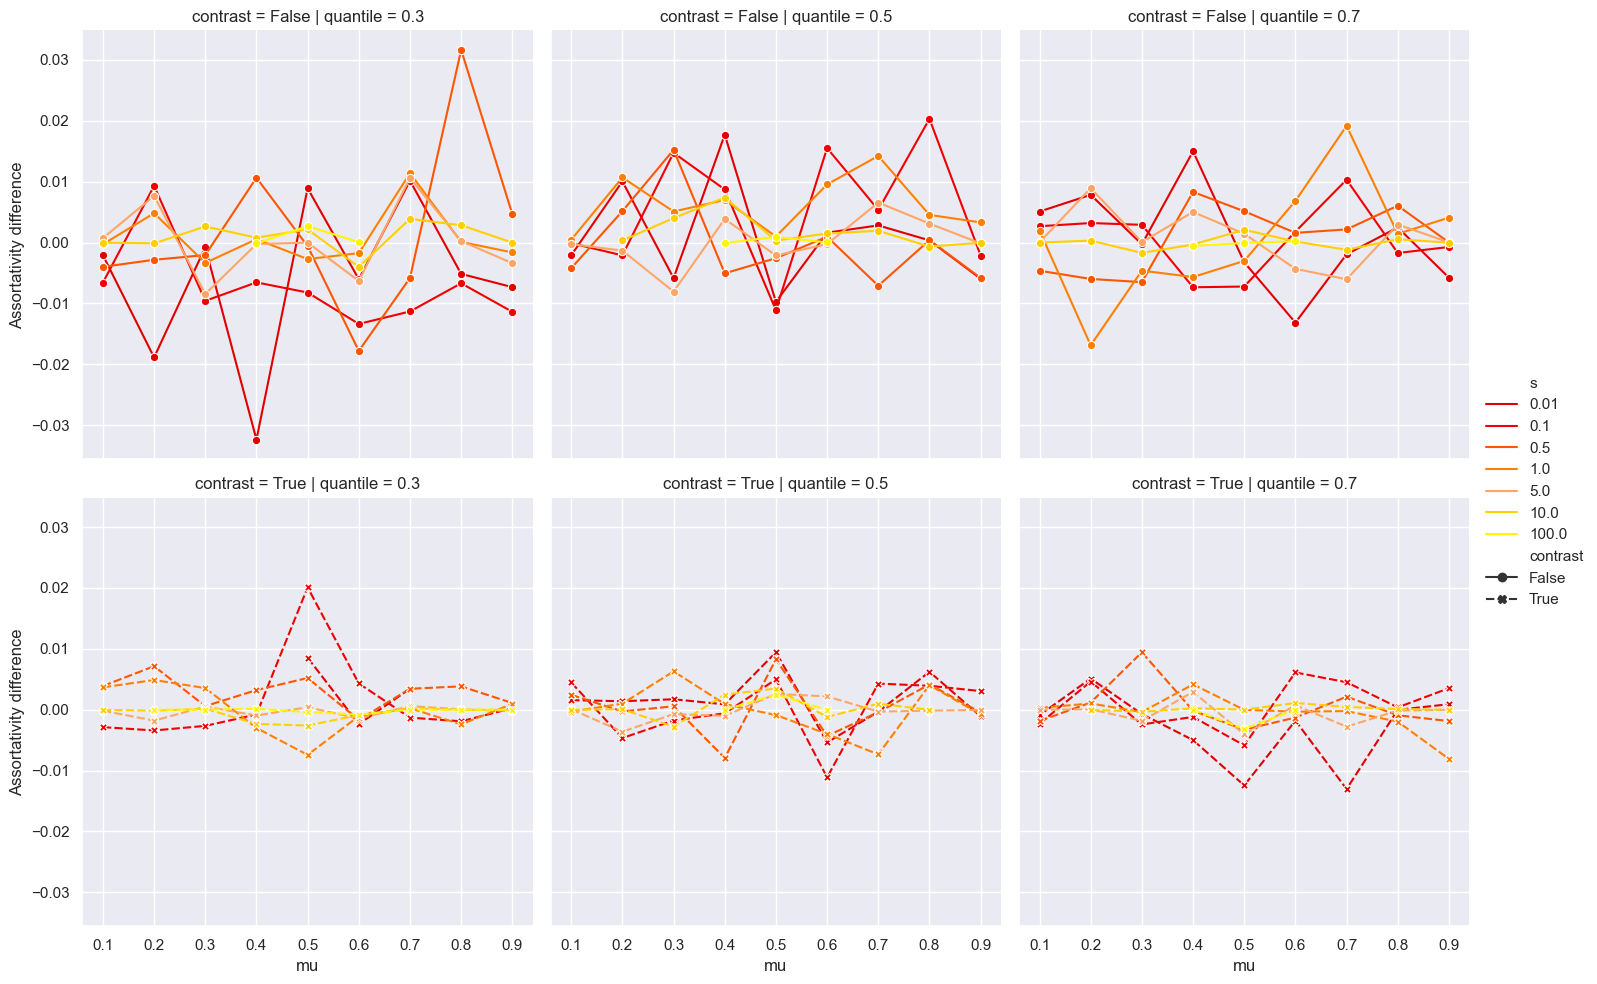

In [136]:
sns.set_theme()

sns.relplot(data = temp2,
            x = "mu", y = "Assortativity difference", hue = "s", col = "quantile", row = "contrast", style = "contrast",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

In [137]:
temp = df2.loc[(df2["Step"].isin([0, 100])) & (df2["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "quantile", "contrast"])["Average degree"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 100, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average degree difference"] = temp.loc[temp["Step"] == 100, "Average degree"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Average degree"].reset_index(drop = True)

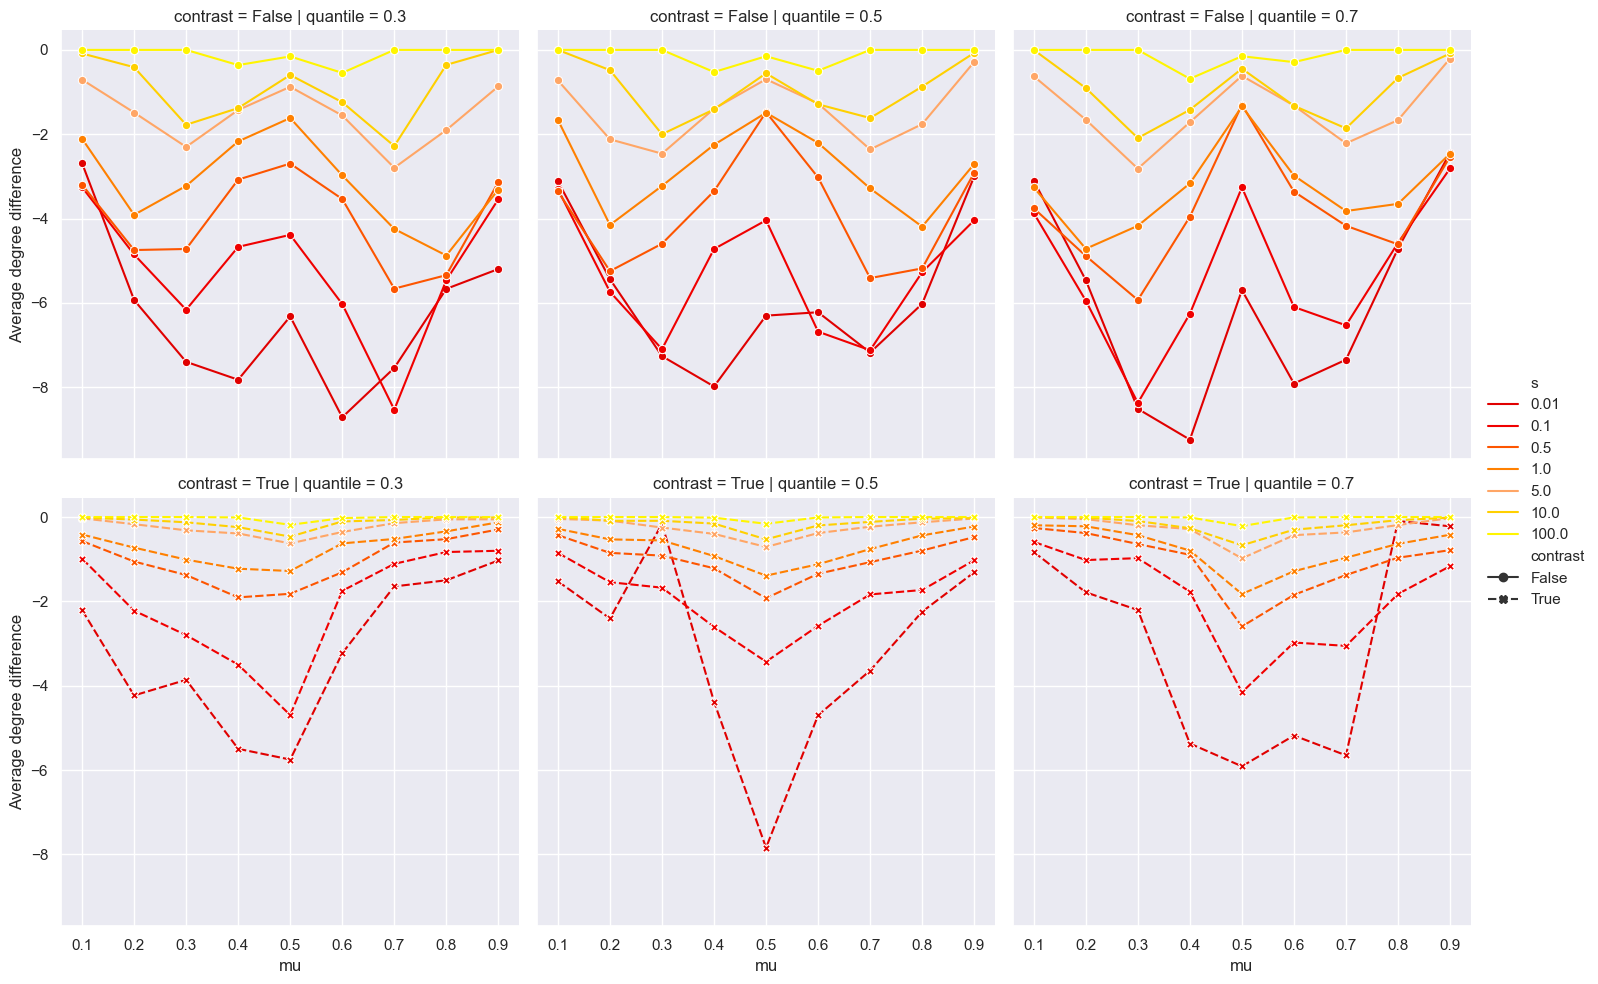

In [138]:
sns.set_theme()

sns.relplot(data = temp2,
            x = "mu", y = "Average degree difference", hue = "s", col = "quantile", row = "contrast", style = "contrast",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

AB and ER network behave completely similarly. Let's plots them side by side:

In [140]:
temp = df2.loc[(df2["Step"].isin([0, 100])), :].groupby(["mu", "s", "strategy", "Step", "quantile", "contrast"])["Opinion"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 100, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average opinion difference"] = temp.loc[temp["Step"] == 100, "Opinion"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

In [141]:
temp3 = df.loc[(df["Step"].isin([0, 100])), :].groupby(["mu", "s", "strategy", "Step", "quantile", "contrast"])["Opinion"].mean().reset_index()
temp4 = temp3.copy()
temp4 = temp4.loc[temp4["Step"] == 100, :]
temp4 = temp4.reset_index(drop = True)
temp4["Average opinion difference"] = temp3.loc[temp["Step"] == 100, "Opinion"].reset_index(drop = True) - temp3.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

In [142]:
temp5 = temp2.merge(temp4, on = ["mu", "s", "strategy", "Step", "quantile", "contrast"], suffixes = ["_ER", "_AB"], how = "inner")
temp5 = temp5.rename({"Average opinion difference_ER":"ER", "Average opinion difference_AB":"AB"}, axis = 1)

In [143]:
temp5 = pd.melt(temp5, id_vars=["mu", "s", "strategy", "Step", "quantile", "contrast"], value_vars=['ER', 'AB'], 
        var_name='network', value_name='Average opinion difference')

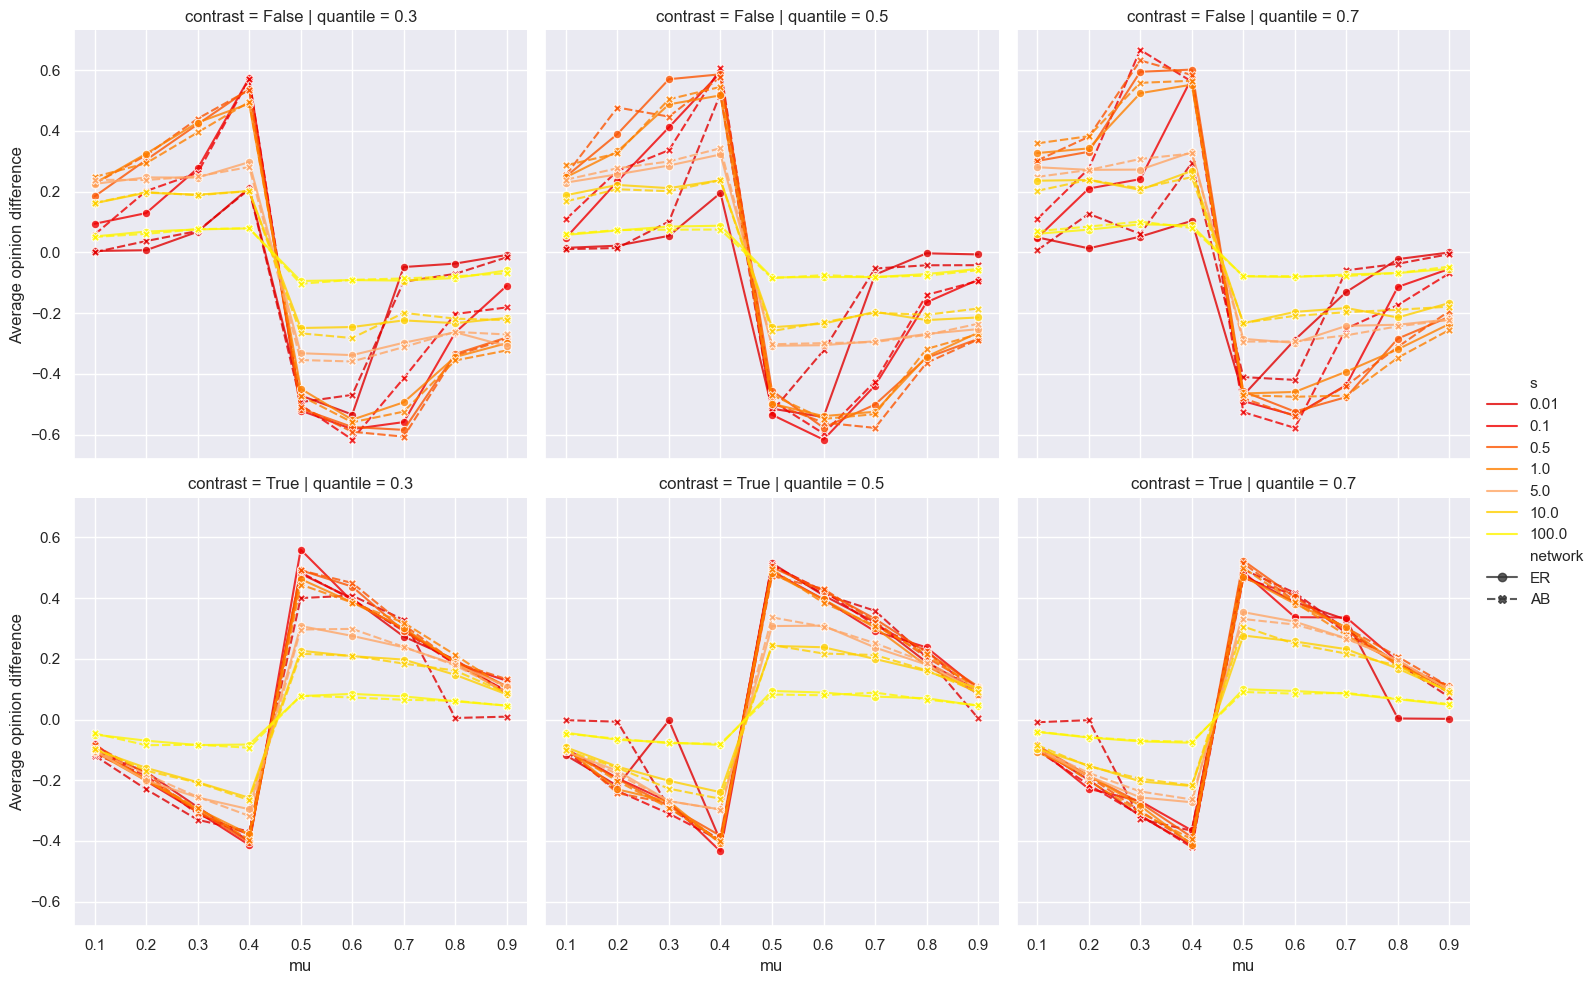

In [145]:
sns.set_theme()

sns.relplot(data = temp5, col = "quantile", row = "contrast", style = "network",
            x = "mu", y = "Average opinion difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict, alpha = 0.8)



In [147]:
temp = df2.loc[(df2["Step"].isin([0, 100])), :].groupby(["mu", "s", "strategy", "Step", "quantile", "contrast"])["Opinion"].std().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 100, :]
temp2 = temp2.reset_index(drop = True)
temp2["Opinion STD difference"] = temp.loc[temp["Step"] == 100, "Opinion"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

In [148]:
temp3 = df.loc[(df["Step"].isin([0, 100])), :].groupby(["mu", "s", "strategy", "Step", "quantile", "contrast"])["Opinion"].std().reset_index()
temp4 = temp3.copy()
temp4 = temp4.loc[temp4["Step"] == 100, :]
temp4 = temp4.reset_index(drop = True)
temp4["Opinion STD difference"] = temp3.loc[temp["Step"] == 100, "Opinion"].reset_index(drop = True) - temp3.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

In [149]:
temp5 = temp2.merge(temp4, on = ["mu", "s", "strategy", "Step", "quantile", "contrast"], suffixes = ["_ER", "_AB"], how = "inner")
temp5 = temp5.rename({"Opinion STD difference_ER":"ER", "Opinion STD difference_AB":"AB"}, axis = 1)

In [150]:
temp5 = pd.melt(temp5, id_vars=["mu", "s", "strategy", "Step", "quantile", "contrast"], value_vars=['ER', 'AB'], 
        var_name='network', value_name='Opinion STD difference')

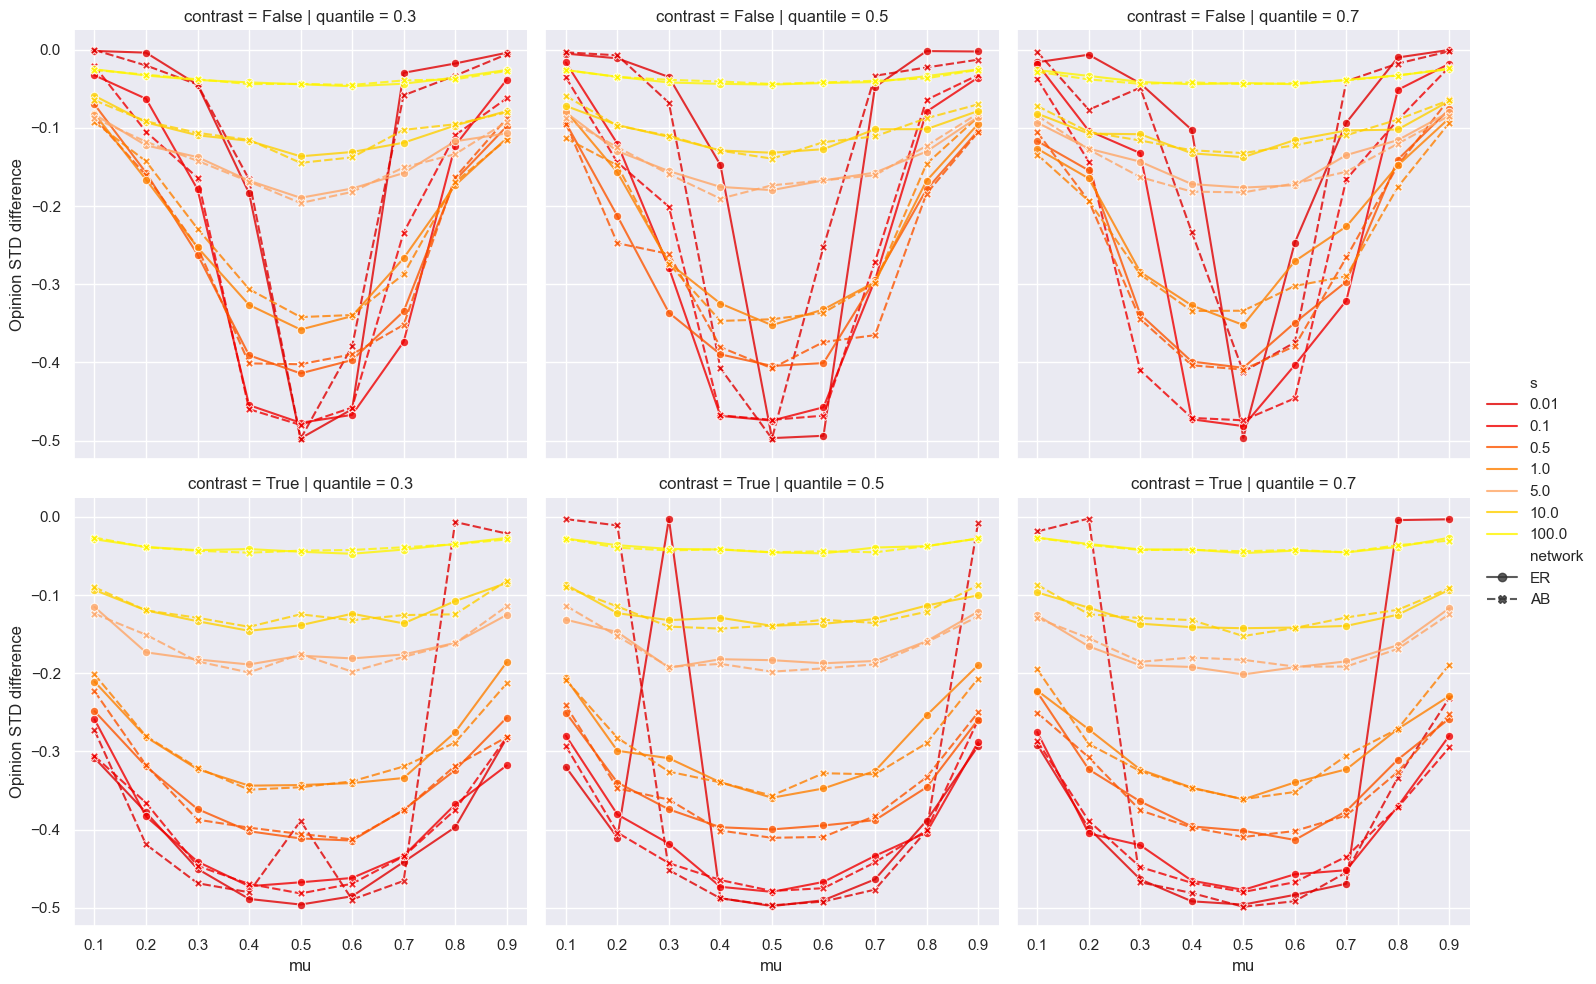

In [151]:
sns.set_theme()

sns.relplot(data = temp5, col = "quantile", row = "contrast", style = "network",
            x = "mu", y = 'Opinion STD difference', hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict, alpha = 0.8)

